# Содержание
0. [Подготовка к работе](#start)  
    1. [Установка расширений и импорт библиотек](#import)
    2. [Подготовка датасета к работе](#prework)
1. [Портрет типичного посетителя блошиного рынка](#portret)
    3. [Статистические расчеты](#portret_stat)
    4. [Визуализация](#portret_vis)
2. [Выраженность мотивов посещения у посетителей блошиных рынков](#motivi)
    5. [Статистические расчеты](#motivi_stat)
    6. [Визуализация](#motivi_vis)
3. [Выраженность практик посещения у посетителей блошиных рынков](#praktiki)
    7. [Статистические расчеты](#praktiki_stat)
    8. [Визуализация](#praktiki_vis)
4. [Взаимосвязь социально-демографических характеристик посетителей блошиных рынков с мотивами и практиками посещения их](#socdem)
    9. [Статистические расчеты](#socdem_stat)
    10. [Визуализация](#socdem_vis)
5. [Взаимосвязь между мотивами и практиками посещения блошиных рынков](#m-p)
    11. [Статистические расчеты](#m-p_stat)
    12. [Визуализация](#m-p_vis)
6. [Взаимосвязь между предпочтениями людей к посещению того или иного блошиного рынка с практиками и мотивами посещения](#rinki)
    14. [Статистические расчеты](#rinki_stat)
    13. [Визуализация](#rinki_vis)

<a id='start'></a>
# Подготовка к работе

<a id='import'></a>
### Импорт библиотек

In [1]:
#загрузка сторонних необходимых библиотек корректна для запуска в jupyter notebook. В других средах может не работать.
! pip install scikit_posthocs
! pip install numdifftools
! conda install git
! pip install git+https://github.com/Shopify/bevel.git#egg=bevel

^C
  Cloning https://github.com/Shopify/bevel.git to c:\users\saper_vodichka\appdata\local\temp\pip-install-jm9px6bc\bevel_aaa28193305541d98b64eac5caaf1c15
  Resolved https://github.com/Shopify/bevel.git to commit 20767b2ab2c2843b71de986ee8c2608c26ba8ee7
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/Shopify/bevel.git 'C:\Users\saper_vodichka\AppData\Local\Temp\pip-install-jm9px6bc\bevel_aaa28193305541d98b64eac5caaf1c15'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import scikit_posthocs as sp
from bevel.linear_ordinal_regression import OrderedLogit

<a id='prework'></a>
### Выгрузка и подготовка датасета к работе

<div style="display: flex;">
    <img src="main-qimg-d6af05ef285f69db9227af4954556073.jpg" style="flex: 1; width: 30%;">
    <img src="Angelsatmamre-trinity-rublev-1410.jpg" style="flex: 1; width: 30%;">
</div>

In [ ]:
sns.set(style='whitegrid', context='paper', font='Times new roman')
palette=['#4B72AC', '#E1D0A5', '#68160D', '#B2A547', '#325E5D', '#9A7737', '#1A0F0D']
sns.color_palette(palette)

[(0.29411764705882354, 0.4470588235294118, 0.6745098039215687),
 (0.8823529411764706, 0.8156862745098039, 0.6470588235294118),
 (0.40784313725490196, 0.08627450980392157, 0.050980392156862744),
 (0.6980392156862745, 0.6470588235294118, 0.2784313725490196),
 (0.19607843137254902, 0.3686274509803922, 0.36470588235294116),
 (0.6039215686274509, 0.4666666666666667, 0.21568627450980393),
 (0.10196078431372549, 0.058823529411764705, 0.050980392156862744)]

In [ ]:
np.int = np.int32
np.float = np.float64
np.bool = np.bool_

In [ ]:
df = pd.read_excel('br_db.xlsx')

In [ ]:
df.head(3)

,Ваш пол,"Ваш возраст (в числовом виде: например, 25)","Какой блошиный рынок Вы посещаете чаще всего? (Если Вы были на блошиных рынках только один раз — отметьте тот, который посетили).",Как часто Вы посещаете блошиные рынки?,"Я не хочу переплачивать за товар только потому, что он новый","Покупая подержанные вещи, я чувствую, что плачу за них справедливую цену","Блошиный рынок — место, где я могу сэкономить деньги","Я покупаю подержанные товары, потому что это уменьшает вред окружающей среде","Мне нравится покупать товары на блошином рынке, потому что я не люблю, когда выбрасывают вещи, которые еще могут пригодиться","Покупая вещи на блошином рынке, я чувствую, что борюсь с расточительством",...,На блошином рынке я общаюсь с другими посетителями,На блошином рынке я общаюсь с продавцами,Я чаще посещаю блошиный рынок в компании,"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить",Я часто торгуюсь на блошином рынке,"Я часто ""перерываю"" товары, а не беру то, что лежит на видном месте",Мой обычный поход на блошиный рынок сопровождается покупками,Ваше текущее семейное положение,Ваш уровень образования,Как Вы оцениваете Ваше материальное положение?
0,Мужской,20,Другое,Очень часто (Каждую неделю и чаще),4,3,3,1,4,4,...,1,4,3,4,5,4,5,Состою в романтических отношениях без совместн...,Высшее неоконченное,"В целом обеспечен(-а), но на дорогостоящие при..."
1,Мужской,52,Блошиный рынок в Измайлово («Вернисаж в Измайл...,Очень часто (Каждую неделю и чаще),1,1,5,5,4,4,...,3,3,4,3,1,2,2,Состою в зарегистрированном браке,Высшее законченное,"Хорошо обеспечен(-а), могу достаточно легко по..."
2,Мужской,37,Другое,Посетил(-а) один раз,3,4,2,4,4,4,...,1,4,5,1,3,4,4,Состою в зарегистрированном браке,Высшее законченное,"В целом обеспечен(-а), но на дорогостоящие при..."


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
# Создаем словарь для хранения соответствия кодов вопросов и длинных названий
dict_orig = {}
dict_short = {}

# Заменяем длинные названия колонок на короткие коды
new_column_names = ['q_{}'.format(i) for i in range(len(df.columns))]
#df.columns = new_column_names

# Заполняем словарь кодов вопросов и длинных названий
for i, column_name in enumerate(new_column_names):
    dict_orig[column_name] = df.columns[i]

# Теперь ваш датафрейм имеет короткие коды для названий колонок,
# а также создан словарь с соответствиями кодов вопросов и длинных названий
df.columns = new_column_names

In [ ]:
dict_orig

{'q_0': 'Ваш пол',
 'q_1': 'Ваш возраст (в числовом виде: например, 25)',
 'q_2': 'Какой блошиный рынок Вы посещаете чаще всего? (Если Вы были на блошиных рынках только один раз — отметьте тот, который посетили).',
 'q_3': 'Как часто Вы посещаете блошиные рынки?',
 'q_4': 'Я не хочу переплачивать за товар только потому, что он новый',
 'q_5': 'Покупая подержанные вещи, я чувствую, что плачу за них справедливую цену',
 'q_6': 'Блошиный рынок — место, где я могу сэкономить деньги',
 'q_7': 'Я покупаю подержанные товары, потому что это уменьшает вред окружающей среде',
 'q_8': 'Мне нравится покупать товары на блошином рынке, потому что я не люблю, когда выбрасывают вещи, которые еще могут пригодиться',
 'q_9': 'Покупая вещи на блошином рынке, я чувствую, что борюсь с расточительством',
 'q_10': 'В посещении блошиных рынков мне важен не столько результат в виде купленных товаров, сколько само нахождение на блошином рынке',
 'q_11': 'Для меня посещение блошиного рынка похоже на маленькое пр

In [ ]:
df['br_type']=df['q_2'].map({'Мосвинтаж' : 1,
                             'Другое': 'Другое',
                             'Блошиный рынок в Измайлово («Вернисаж в Измайлово»)': 0,
                             'Левша': 0,
                             'Тишинка (Художественный проект «Блошиный рынок»)':1,
                             'Антикварный маркет «Блошинка»':1})

In [ ]:
df['econom'] = ((df['q_4'] + df['q_5'] + df['q_6']) / 3).round(2)
df['ideol'] = ((df['q_7'] + df['q_8'] + df['q_9']) / 3).round(2)
df['recrea'] = ((df['q_10'] + df['q_11'] + df['q_12']) / 3).round(2)
df['moda'] = ((df['q_13'] + df['q_14'] + df['q_15']) / 3).round(2)
df['nostal'] = ((df['q_16'] + df['q_17'] + df['q_18']) / 3).round(2)
df['collect'] = ((df['q_19'] + df['q_20']) / 2).round(2)

In [ ]:
df_short=df.copy()

df_short['q_28'] = df_short['q_28'].replace({'Состою в зарегистрированном браке': 'Зарегистрированный брак',
                                            'Никогда не состоял(-а) в браке и не состою в романтических отношениях':'Не в отношениях',
                                            'Состою в романтических отношениях без совместного проживания':'Романтические отношения',
                                            'Состою в незарегистрированном браке ("гражданском")':'Незарегистрированный брак',
                                            'Разведен(-а)':'Разведен(-а)',
                                            'Вдова (вдовец)':'Вдова (вдовец)'})
df_short['q_29'] = df_short['q_29'].replace({'Высшее законченное': 'Высшее законченное',
                                            'Высшее неоконченное':'Высшее неоконченное',
                                            'Среднее профессиональное (училище, колледж, техникум и т.д.)':'Среднее профессиональное',
                                            'Среднее полное (10-11 классов школы)':'Среднее полное',
                                            'Неполное среднее (не более 8-9 классов школы)':'Неполное среднее'})
df_short['q_30'] = df_short['q_30'].replace({'В целом обеспечен(-а), но на дорогостоящие приобретения (автомобиля или дорогостоящий отдых) нужно будет некоторое время копить': 'В целом обспечен, но на авто/отдых нужно подкопить',
                                            'Денег достаточно для приобретения продуктов и одежды, но покупка бытовой техники проблематична':'Хватает на покупку одежды',
                                            'Денег хватает только на продукты питания, а покупка одежды уже вызывает затруднения':'Хватает на еду',
                                            'Хорошо обеспечен(-а), могу достаточно легко позволить себе покупку автомобиля или дорогостоящий отдых':'Полностью обеспечен',
                                            'Денег не хватает даже на продукты питания, постоянно приходится влезать в долги':'Не хватает на еду'})

<a id='portret'></a>
# Составить портрет типичного посетителя блошиного рынка

<a id='portret_stat'></a>
### Статистика

In [ ]:
#ненормальное распределение
print(stats.shapiro(df['q_1']))
print(stats.shapiro(df['econom']))
print(stats.shapiro(df['ideol']))
print(stats.shapiro(df['recrea']))
print(stats.shapiro(df['moda']))
print(stats.shapiro(df['nostal']))
print(stats.shapiro(df['collect']))

ShapiroResult(statistic=0.9299384355545044, pvalue=3.642195225972422e-11)
ShapiroResult(statistic=0.9559194445610046, pvalue=2.924843833795876e-08)
ShapiroResult(statistic=0.936098039150238, pvalue=1.5081660920124307e-10)
ShapiroResult(statistic=0.8176389932632446, pvalue=9.10898735168907e-19)
ShapiroResult(statistic=0.8861237168312073, pvalue=9.387708506066773e-15)
ShapiroResult(statistic=0.8576334714889526, pvalue=1.3652491602223594e-16)
ShapiroResult(statistic=0.8951988220214844, pvalue=4.224086900574131e-14)


In [ ]:
print('Мода пола:',df['q_0'].mode()[0])
print('Медиана возраста:',df['q_1'].median())
print('Мода семейного положения:',df['q_28'].mode()[0])
print('Мода уровня образования:',df['q_29'].mode()[0])
print('Мода материального положения:',df['q_30'].mode()[0])

Мода пола: Женский
Медиана возраста: 40.0
Мода семейного положения: Состою в зарегистрированном браке
Мода уровня образования: Высшее законченное
Мода материального положения: В целом обеспечен(-а), но на дорогостоящие приобретения (автомобиля или дорогостоящий отдых) нужно будет некоторое время копить


In [ ]:
print('Мода самого частопосещаемого рынка:',df['q_2'].mode()[0])
print('Мода частоты посещения:',df['q_3'].mode()[0])

Мода самого частопосещаемого рынка: Мосвинтаж
Мода частоты посещения: Иногда (Несколько раз в течение полугода)


<a id='portret_vis'></a>
### Визуализация

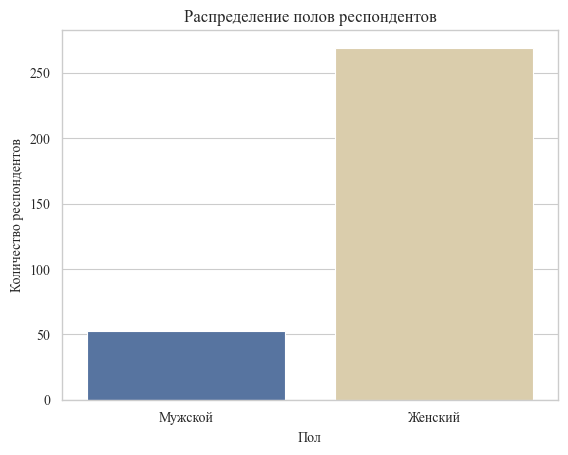

In [ ]:
sns.countplot(x='q_0', data=df, palette=palette)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Пол', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение полов респондентов', fontsize=12)
plt.savefig('пол_расп.png', dpi=300)

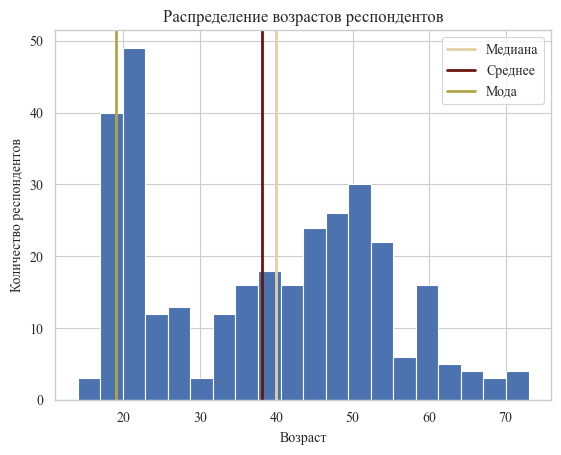

In [ ]:
sns.histplot(df['q_1'], bins=20, kde=False, alpha=1)

plt.axvline(df['q_1'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['q_1'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
plt.axvline(df['q_1'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Возраст', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение возрастов респондентов', fontsize=12)
plt.savefig('возраст_расп.png', dpi=300)

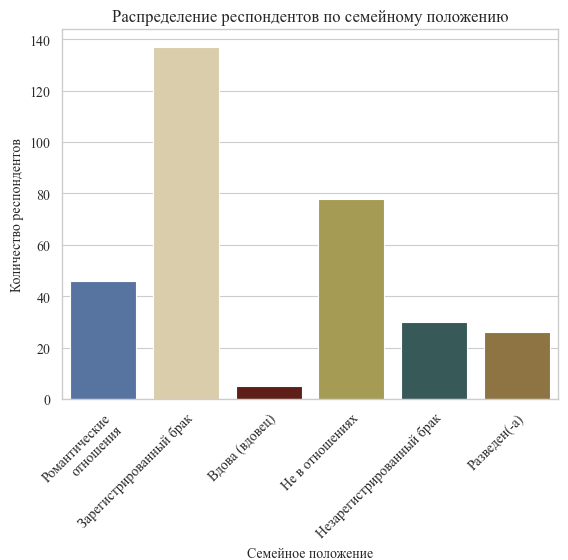

In [ ]:
sns.countplot(x='q_28', data=df_short, palette=palette)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Семейное положение', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение респондентов по семейному положению', fontsize=12)
plt.savefig('сп_расп.png', dpi=300, bbox_inches='tight')

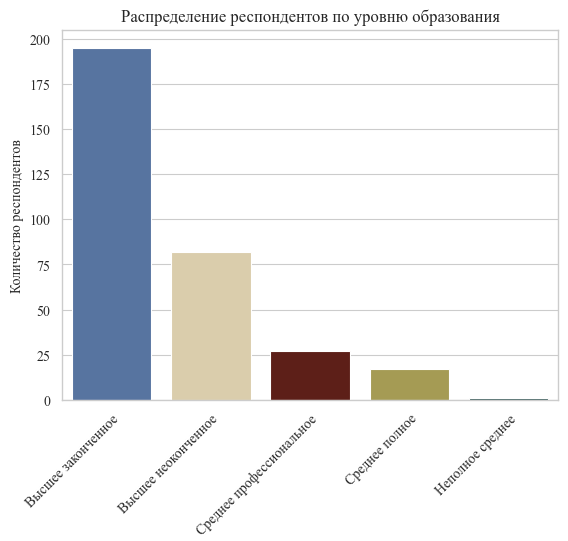

In [ ]:
sns.countplot(x='q_29', data=df_short, palette=palette, order = ['Высшее законченное', 'Высшее неоконченное', 'Среднее профессиональное', 'Среднее полное', 'Неполное среднее'])

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Уровень образования', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение респондентов по уровню образования', fontsize=12)
plt.savefig('обр_расп.png', dpi=300, bbox_inches='tight')

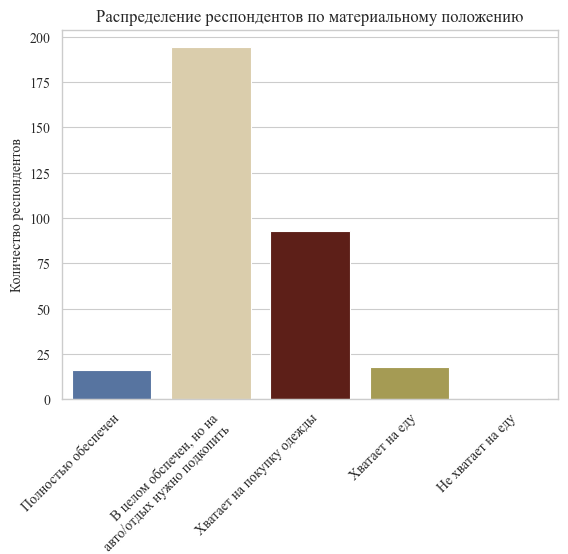

In [ ]:
sns.countplot(x='q_30', data=df_short, palette=palette, order=['Полностью обеспечен', 'В целом обспечен, но на авто/отдых нужно подкопить', 'Хватает на покупку одежды', 'Хватает на еду', 'Не хватает на еду'])

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Материальное положение', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение респондентов по материальному положению', fontsize=12)
plt.savefig('матпол_расп.png', dpi=300, bbox_inches='tight')

<a id='motivi'></a>
# Выяснить, насколько выражены те или иные мотивы посещения у посетителей блошиных рынков.

<a id='motivi_stat'></a>
### Статистика

In [ ]:
print('Медиана экономического мотива:', df['econom'].median())
print('Медиана идеологического мотива:', df['ideol'].median())
print('Медиана рекреационного мотива:', df['recrea'].median())
print('Медиана мотива моды:', df['moda'].median())
print('Медиана ностальгического мотива:', df['nostal'].median())
print('Медиана мотива коллекционирования:', df['collect'].median())

Медиана экономического мотива: 2.67
Медиана идеологического мотива: 2.67
Медиана рекреационного мотива: 4.67
Медиана мотива моды: 4.33
Медиана ностальгического мотива: 4.33
Медиана мотива коллекционирования: 3.5


In [ ]:
print('P-value теста Шапиро экономического мотива:', "{:.3f}".format(stats.shapiro(df['econom'])[1]))
print('P-value теста Шапиро идеологического мотива:', "{:.3f}".format(stats.shapiro(df['ideol'])[1]))
print('P-value теста Шапиро рекреационного мотива:', "{:.3f}".format(stats.shapiro(df['recrea'])[1]))
print('P-value теста Шапиро мотива моды:', "{:.3f}".format(stats.shapiro(df['moda'])[1]))
print('P-value теста Шапиро ностальгического мотива:', "{:.3f}".format(stats.shapiro(df['nostal'])[1]))
print('P-value теста Шапиро мотива коллекционирования:', "{:.3f}".format(stats.shapiro(df['collect'])[1]))

P-value теста Шапиро экономического мотива: 0.000
P-value теста Шапиро идеологического мотива: 0.000
P-value теста Шапиро рекреационного мотива: 0.000
P-value теста Шапиро мотива моды: 0.000
P-value теста Шапиро ностальгического мотива: 0.000
P-value теста Шапиро мотива коллекционирования: 0.000


<a id='motivi_vis'></a>
### Визуализация

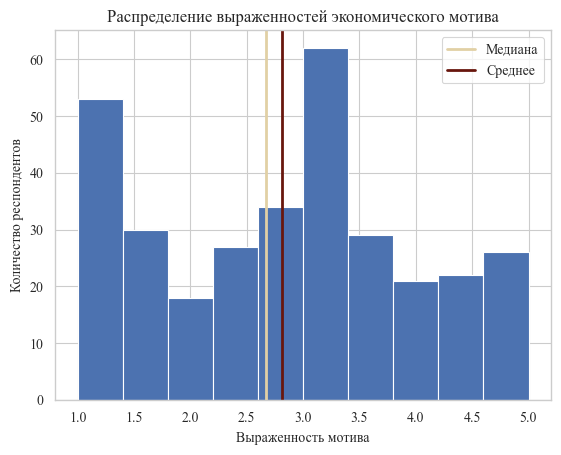

In [ ]:
sns.histplot(df['econom'], kde=False, alpha=1)

plt.axvline(df['econom'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['econom'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей экономического мотива', fontsize=12)
plt.savefig('эконом_расп.png', dpi=300)

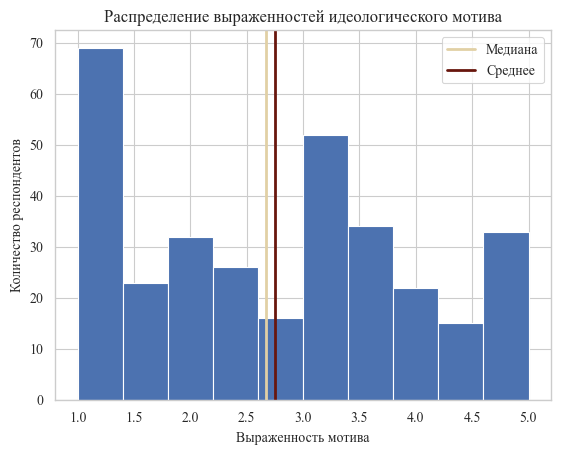

In [ ]:
sns.histplot(df['ideol'], kde=False, alpha=1)

plt.axvline(df['ideol'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['ideol'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей идеологического мотива', fontsize=12)
plt.savefig('идеол_расп.png', dpi=300)

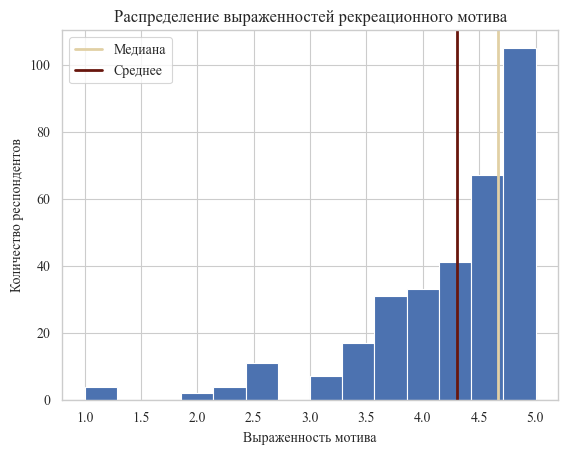

In [ ]:
sns.histplot(df['recrea'], kde=False, alpha=1)

plt.axvline(df['recrea'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['recrea'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей рекреационного мотива', fontsize=12)
plt.savefig('рекреа_расп.png', dpi=300)

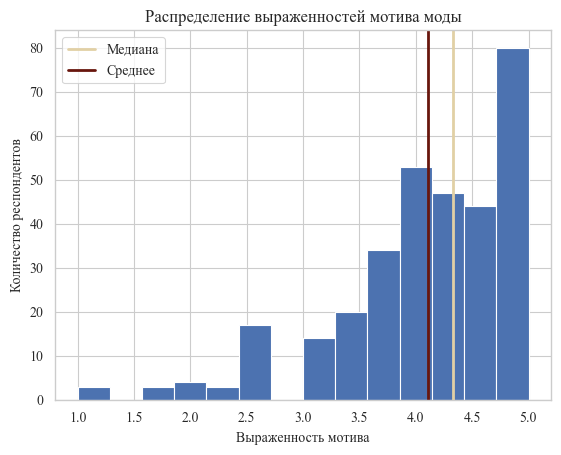

In [ ]:
sns.histplot(df['moda'], kde=False, alpha=1)

plt.axvline(df['moda'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['moda'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей мотива моды', fontsize=12)
plt.savefig('мода_расп.png', dpi=300)

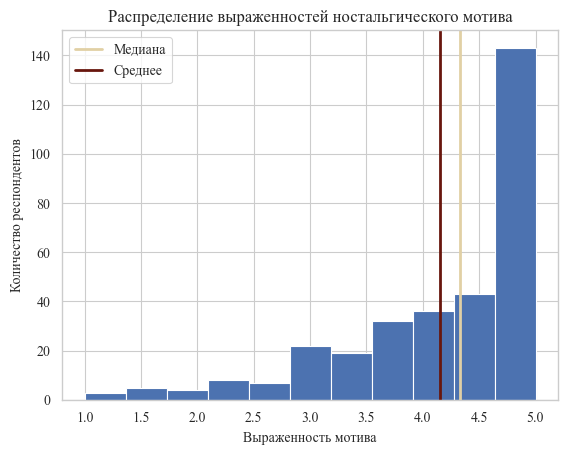

In [ ]:
sns.histplot(df['nostal'], kde=False, alpha=1)

plt.axvline(df['nostal'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['nostal'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей ностальгического мотива', fontsize=12)
plt.savefig('ностал_расп.png', dpi=300)

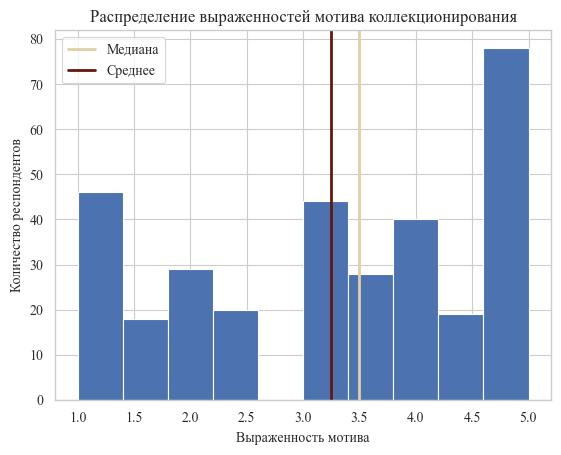

In [ ]:
sns.histplot(df['collect'], kde=False, alpha=1)

plt.axvline(df['collect'].median(), color=palette[1], linestyle='-', label='Медиана', linewidth=2)
plt.axvline(round(df['collect'].mean(), 2), color=palette[2], linestyle='-', label='Среднее', linewidth=2)
#plt.axvline(df['econom'].mode()[0], color=palette[3], linestyle='-', label='Мода', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Выраженность мотива', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение выраженностей мотива коллекционирования', fontsize=12)
plt.savefig('коллект_расп.png', dpi=300)

<a id='praktiki'></a>
# Выяснить, насколько выражены те или иные практики посещения у посетителей блошиных рынков

<a id='praktiki_stat'></a>
### Статистика

In [ ]:
#q_21 - q_27
print('Мода частоты посещения:', df['q_3'].mode()[0])
print('Медиана общения с другими посетителями:', df['q_21'].median())
print('Медиана общения с продавцами:', df['q_22'].median())
print('Медиана частоты посещения в компании:', df['q_23'].median())
print('Медиана знания конкретных мест для посещения:', df['q_24'].median())
print('Медиана частоты торга:', df['q_25'].median())
print('Медиана частоты перерывания товаров:', df['q_26'].median())
print('Медиана совершения покупок:', df['q_27'].median())

Мода частоты посещения: Иногда (Несколько раз в течение полугода)
Медиана общения с другими посетителями: 2.0
Медиана общения с продавцами: 4.0
Медиана частоты посещения в компании: 3.0
Медиана знания конкретных мест для посещения: 3.0
Медиана частоты торга: 3.0
Медиана частоты перерывания товаров: 4.0
Медиана совершения покупок: 4.0


<a id='praktiki_vis'></a>
### Визуализация

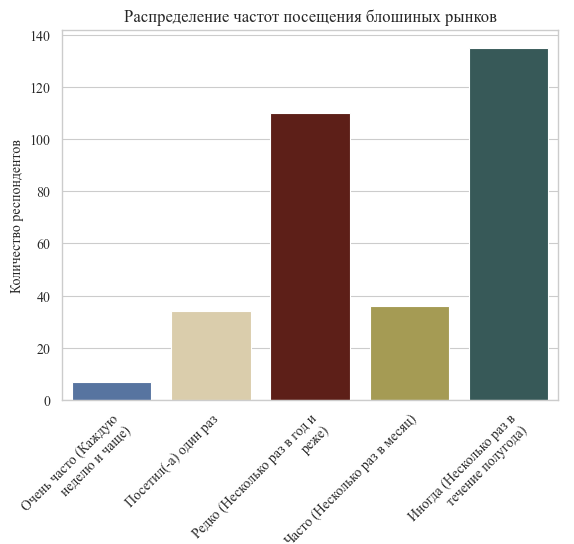

In [ ]:
sns.countplot(x='q_3', data=df, palette=palette)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Частота посещения', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение частот посещения блошиных рынков', fontsize=12)
plt.savefig('посещение_расп.png', dpi=300, bbox_inches='tight')

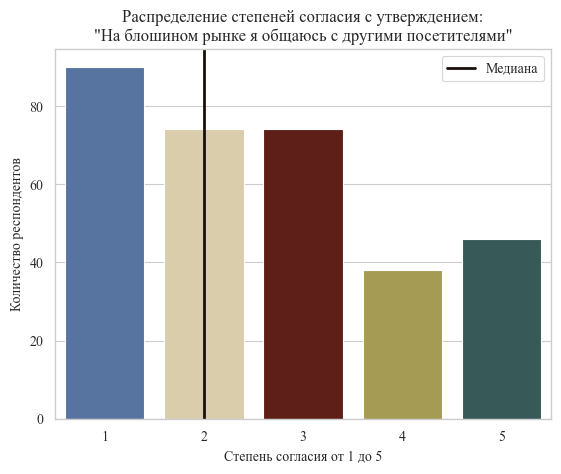

In [ ]:
sns.countplot(x='q_21', data=df_short, palette=palette)

plt.axvline(1, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"', fontsize=12)
plt.savefig('общениe_с_другими_посетителями_расп.png', dpi=300)

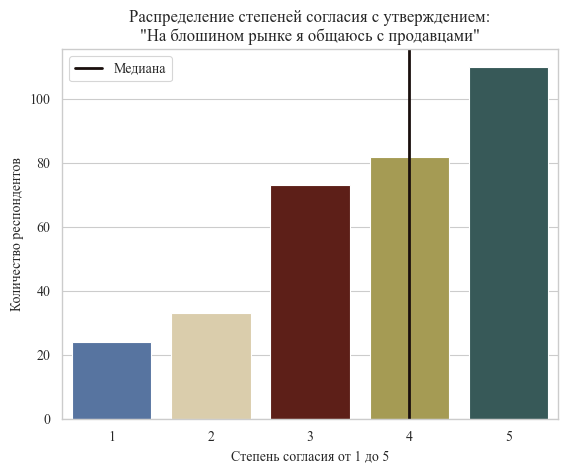

In [ ]:
sns.countplot(x='q_22', data=df_short, palette=palette)

plt.axvline(3, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"', fontsize=12)
plt.savefig('общениe_с_продавцами_расп.png', dpi=300)

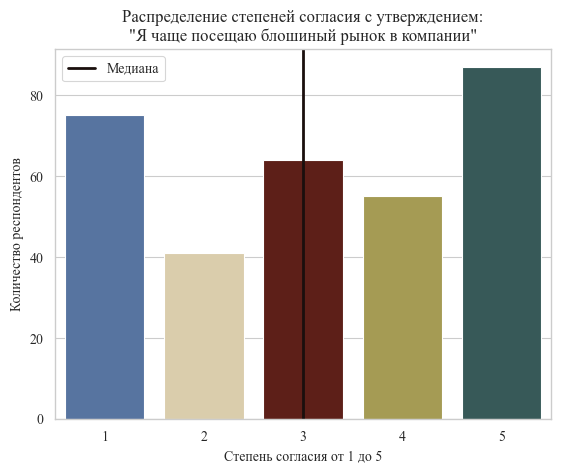

In [ ]:
sns.countplot(x='q_23', data=df_short, palette=palette)

plt.axvline(2, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"', fontsize=12)
plt.savefig('посещение_в_компании.png', dpi=300)

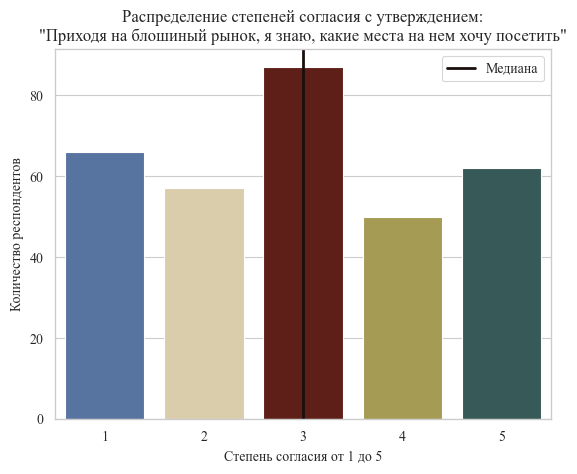

In [ ]:
sns.countplot(x='q_24', data=df_short, palette=palette)

plt.axvline(2, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"', fontsize=12)
plt.savefig('конкретные_места_расп.png', dpi=300)

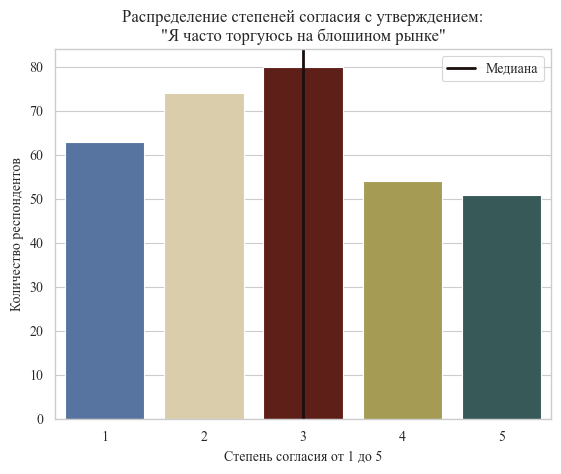

In [ ]:
sns.countplot(x='q_25', data=df_short, palette=palette)

plt.axvline(2, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"', fontsize=12)
plt.savefig('торг.png', dpi=300)

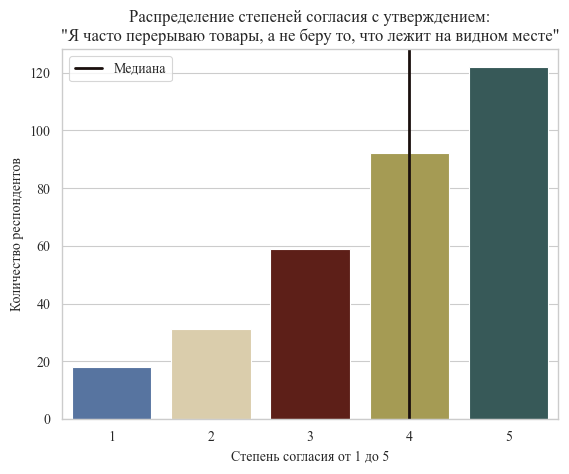

In [ ]:
sns.countplot(x='q_26', data=df_short, palette=palette)

plt.axvline(3, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"', fontsize=12)
plt.savefig('перерывание.png', dpi=300)

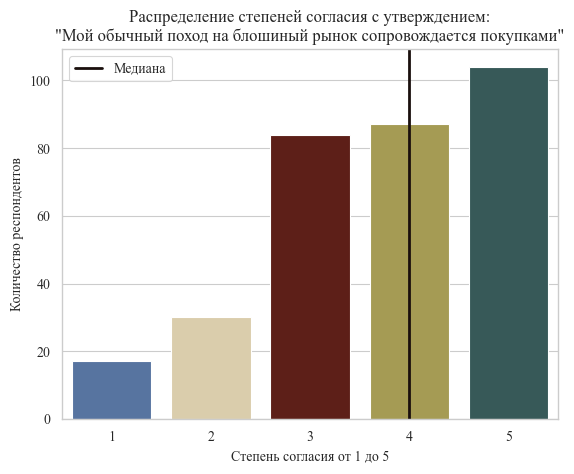

In [ ]:
sns.countplot(x='q_27', data=df_short, palette=palette)

plt.axvline(3, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Степень согласия от 1 до 5', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение степеней согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"', fontsize=12)
plt.savefig('покупки.png', dpi=300)

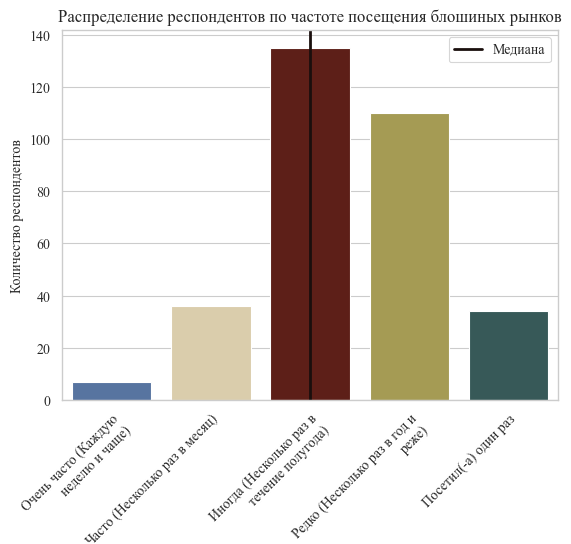

In [ ]:
sns.countplot(x='q_3', data=df_short, palette=palette, order=['Очень часто (Каждую неделю и чаще)','Часто (Несколько раз в месяц)','Иногда (Несколько раз в течение полугода)','Редко (Несколько раз в год и реже)','Посетил(-а) один раз'])

plt.axvline(2, color=palette[6], linestyle='-', label='Медиана', linewidth=2)
plt.legend(fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Частота посещения блошиных рынков', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение респондентов по частоте посещения блошиных рынков', fontsize=12)
plt.savefig('частота_посещения_расп.png', dpi=300, bbox_inches='tight')

<a id='socdem'></a>
# Выяснить, как социально-демографические характеристики взаимосвязаны с мотивами и практиками посещения блошиных рынков.

<a id='socdem_stat'></a>
### Статистика

**Мотивы**

In [ ]:
motivi = [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         ['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]

In [ ]:
for i in range(len(motivi)):
    pv = round(stats.mannwhitneyu(df[df['q_0']=='Мужской'][motivi[i][0]], df[df['q_0']=='Женский'][motivi[i][0]])[1], 3)
    print(f'P-value критерия Манна-Уитни для {motivi[i][1]} и пола: {pv}')

P-value критерия Манна-Уитни для экономического мотива и пола: 0.002
P-value критерия Манна-Уитни для идеологического мотива и пола: 0.519
P-value критерия Манна-Уитни для рекреационного мотива и пола: 0.046
P-value критерия Манна-Уитни для мотива моды и пола: 0.002
P-value критерия Манна-Уитни для ностальгического мотива и пола: 0.036
P-value критерия Манна-Уитни для мотива коллекционирования и пола: 0.55


In [ ]:
for i in range(len(motivi)):
    cor, pv = [round(ii, 3) for ii in stats.spearmanr(df['q_1'], df[motivi[i][0]])]
    print(f'P-value коэффициента корреляции Спирмена для {motivi[i][1]} и возраста: {pv}, коэффициент: {cor}')

P-value коэффициента корреляции Спирмена для экономического мотива и возраста: 0.0, коэффициент: -0.242
P-value коэффициента корреляции Спирмена для идеологического мотива и возраста: 0.001, коэффициент: -0.186
P-value коэффициента корреляции Спирмена для рекреационного мотива и возраста: 0.004, коэффициент: 0.161
P-value коэффициента корреляции Спирмена для мотива моды и возраста: 0.012, коэффициент: 0.139
P-value коэффициента корреляции Спирмена для ностальгического мотива и возраста: 0.0, коэффициент: 0.314
P-value коэффициента корреляции Спирмена для мотива коллекционирования и возраста: 0.0, коэффициент: 0.288


In [ ]:
for i in range(len(motivi)):
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_28')[motivi[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {motivi[i][1]} и семейного положения: {pv}')
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_29')[motivi[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {motivi[i][1]} и уровня образования: {pv}')
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_30')[motivi[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {motivi[i][1]} и материального положения: {pv}')
    print('')

P-value критерия Краскела-Уоллиса для экономического мотива и семейного положения: 0.0
P-value критерия Краскела-Уоллиса для экономического мотива и уровня образования: 0.0
P-value критерия Краскела-Уоллиса для экономического мотива и материального положения: 0.0

P-value критерия Краскела-Уоллиса для идеологического мотива и семейного положения: 0.014
P-value критерия Краскела-Уоллиса для идеологического мотива и уровня образования: 0.026
P-value критерия Краскела-Уоллиса для идеологического мотива и материального положения: 0.003

P-value критерия Краскела-Уоллиса для рекреационного мотива и семейного положения: 0.09
P-value критерия Краскела-Уоллиса для рекреационного мотива и уровня образования: 0.105
P-value критерия Краскела-Уоллиса для рекреационного мотива и материального положения: 0.136

P-value критерия Краскела-Уоллиса для мотива моды и семейного положения: 0.079
P-value критерия Краскела-Уоллиса для мотива моды и уровня образования: 0.0
P-value критерия Краскела-Уоллиса дл

In [ ]:
names_sp = ['Вдова (вдовец)',
         'Никогда не состоял(-а) в браке и не состою в романтических отношениях',
         'Разведен(-а)',
         'Состою в зарегистрированном браке',
         'Состою в незарегистрированном браке ("гражданском")',
         'Состою в романтических отношениях без совместного проживания']
names_obr = ['Высшее законченное',
             'Высшее неоконченное',
             'Неполное среднее (не более 8-9 классов школы)',
             'Среднее полное (10-11 классов школы)',
             'Среднее профессиональное (училище, колледж, техникум и т.д.)']
names_mp = ['В целом обеспечен(-а), но на дорогостоящие приобретения (автомобиля или дорогостоящий отдых) нужно будет некоторое время копить',
            'Денег достаточно для приобретения продуктов и одежды, но покупка бытовой техники проблематична',
            'Денег не хватает даже на продукты питания, постоянно приходится влезать в долги',
            'Денег хватает только на продукты питания, а покупка одежды уже вызывает затруднения',
            'Хорошо обеспечен(-а), могу достаточно легко позволить себе покупку автомобиля или дорогостоящий отдых']
names_posecheniye = ['Иногда (Несколько раз в течение полугода)',
                    'Очень часто (Каждую неделю и чаще)',
                    'Посетил(-а) один раз',
                    'Редко (Несколько раз в год и реже)',
                    'Часто (Несколько раз в месяц)']

In [ ]:
#семейное положение
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv_by_education = df.groupby('q_28')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_sp
    dunn_motiv.index = names_sp
    dunn_motiv.to_excel(f'dunn_sp_{i[0]}.xlsx')

In [ ]:
#уровень образования
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv_by_education = df.groupby('q_29')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_obr
    dunn_motiv.index = names_obr
    print(i[0])
    print(dunn_motiv)
    print('')
    dunn_motiv.to_excel(f'dunn_obr_{i[0]}.xlsx')

econom
                                                    Высшее законченное  \
Высшее законченное                                               1.000   
Высшее неоконченное                                              0.000   
Неполное среднее (не более 8-9 классов школы)                    1.000   
Среднее полное (10-11 классов школы)                             0.014   
Среднее профессиональное (училище, колледж, тех...               0.284   

                                                    Высшее неоконченное  \
Высшее законченное                                                  0.0   
Высшее неоконченное                                                 1.0   
Неполное среднее (не более 8-9 классов школы)                       1.0   
Среднее полное (10-11 классов школы)                                1.0   
Среднее профессиональное (училище, колледж, тех...                  1.0   

                                                    Неполное среднее (не более 8-9 классов школы)

In [ ]:
#материальное положение
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         #['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv_by_education = df.groupby('q_30')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_mp
    dunn_motiv.index = names_mp
    dunn_motiv.to_excel(f'dunn_mp_{i[0]}.xlsx')

**Практики**

In [ ]:
praktiki = [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           ['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           ['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           ['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']]

In [ ]:
for i in range(len(praktiki)):
    pv = round(stats.mannwhitneyu(df[df['q_0']=='Мужской'][praktiki[i][0]], df[df['q_0']=='Женский'][praktiki[i][0]])[1], 3)
    print(f'P-value критерия Манна-Уитни для {praktiki[i][1]} и пола: {pv}')

P-value критерия Манна-Уитни для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и пола: 0.246
P-value критерия Манна-Уитни для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и пола: 0.727
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я чаще посещаю блошиный рынок в компании" и пола: 0.908
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить" и пола: 0.449
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я часто торгуюсь на блошином рынке" и пола: 0.021
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я часто перерываю товары, а не беру то, что лежит на видном месте" и пола: 0.361
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Мой обычный поход на блошиный рынок сопровождается покупками" и пола: 0.736


In [ ]:
for i in range(len(praktiki)):
    cor, pv = [round(ii, 3) for ii in stats.spearmanr(df['q_1'], df[praktiki[i][0]])]
    print(f'P-value коэффициента корреляции Спирмена для {praktiki[i][1]} и возраста: {pv}, коэффициент: {cor}')

P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и возраста: 0.0, коэффициент: 0.465
P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и возраста: 0.0, коэффициент: 0.25
P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"Я чаще посещаю блошиный рынок в компании" и возраста: 0.011, коэффициент: -0.142
P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить" и возраста: 0.0, коэффициент: 0.308
P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"Я часто торгуюсь на блошином рынке" и возраста: 0.0, коэффициент: 0.321
P-value коэффициента корреляции Спирмена для степени согласия с утверждением:
"Я часто перерываю товары, а не беру то, что лежит на видном месте" и возраста: 0.04, коэффициент: -0.11

In [ ]:
for i in range(len(praktiki)):
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_28')[praktiki[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {praktiki[i][1]} и семейного положения: {pv}')
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_29')[praktiki[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {praktiki[i][1]} и уровня образования: {pv}')
    stat, pv = [round(ii, 3) for ii in stats.kruskal(*df.groupby('q_30')[praktiki[i][0]].apply(list).tolist())]
    print(f'P-value критерия Краскела-Уоллиса для {praktiki[i][1]} и материального положения: {pv}')
    print('')

P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и семейного положения: 0.0
P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и уровня образования: 0.0
P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и материального положения: 0.013

P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и семейного положения: 0.003
P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и уровня образования: 0.045
P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и материального положения: 0.18

P-value критерия Краскела-Уоллиса для степени согласия с утверждением:
"Я чаще посещаю блошиный рынок в компа

In [ ]:
#семейное положение
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           ['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    motiv_by_education = df.groupby('q_28')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_sp
    dunn_motiv.index = names_sp
    dunn_motiv.to_excel(f'dunn_sp_{i[0]}.xlsx')
    print(i[0])
    print(dunn_motiv)
    print('')

q_21
                                                    Вдова (вдовец)  \
Вдова (вдовец)                                               1.000   
Никогда не состоял(-а) в браке и не состою в ро...           0.008   
Разведен(-а)                                                 1.000   
Состою в зарегистрированном браке                            0.507   
Состою в незарегистрированном браке ("гражданск...           0.063   
Состою в романтических отношениях без совместно...           0.015   

                                                    Никогда не состоял(-а) в браке и не состою в романтических отношениях  \
Вдова (вдовец)                                                                                  0.008                       
Никогда не состоял(-а) в браке и не состою в ро...                                              1.000                       
Разведен(-а)                                                                                    0.007                       
Сост

q_25
                                                    Вдова (вдовец)  \
Вдова (вдовец)                                               1.000   
Никогда не состоял(-а) в браке и не состою в ро...           0.081   
Разведен(-а)                                                 1.000   
Состою в зарегистрированном браке                            1.000   
Состою в незарегистрированном браке ("гражданск...           0.123   
Состою в романтических отношениях без совместно...           0.214   

                                                    Никогда не состоял(-а) в браке и не состою в романтических отношениях  \
Вдова (вдовец)                                                                                  0.081                       
Никогда не состоял(-а) в браке и не состою в ро...                                              1.000                       
Разведен(-а)                                                                                    0.226                       
Сост

In [ ]:
#уровень образования
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    motiv_by_education = df.groupby('q_29')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_obr
    dunn_motiv.index = names_obr
    dunn_motiv.to_excel(f'dunn_obr_{i[0]}.xlsx')
    print(i[0])
    print(dunn_motiv)
    print('')

q_21
                                                    Высшее законченное  \
Высшее законченное                                               1.000   
Высшее неоконченное                                              0.000   
Неполное среднее (не более 8-9 классов школы)                    1.000   
Среднее полное (10-11 классов школы)                             0.023   
Среднее профессиональное (училище, колледж, тех...               1.000   

                                                    Высшее неоконченное  \
Высшее законченное                                                 0.00   
Высшее неоконченное                                                1.00   
Неполное среднее (не более 8-9 классов школы)                      1.00   
Среднее полное (10-11 классов школы)                               1.00   
Среднее профессиональное (училище, колледж, тех...                 0.02   

                                                    Неполное среднее (не более 8-9 классов школы)  

In [ ]:
#материальное положение
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           #['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           #['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           #['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    motiv_by_education = df.groupby('q_30')[i[0]].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_education, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_mp
    dunn_motiv.index = names_mp
    dunn_motiv.to_excel(f'dunn_mp_{i[0]}.xlsx')
    print(i[0])
    print(dunn_motiv)
    print('')

q_21
                                                    В целом обеспечен(-а), но на дорогостоящие приобретения (автомобиля или дорогостоящий отдых) нужно будет некоторое время копить  \
В целом обеспечен(-а), но на дорогостоящие прио...                                              1.000                                                                                 
Денег достаточно для приобретения продуктов и о...                                              0.018                                                                                 
Денег не хватает даже на продукты питания, пост...                                              1.000                                                                                 
Денег хватает только на продукты питания, а пок...                                              0.645                                                                                 
Хорошо обеспечен(-а), могу достаточно легко поз...                              

<a id='socdem_vis'></a>
### Визуализация

**Мотивы**

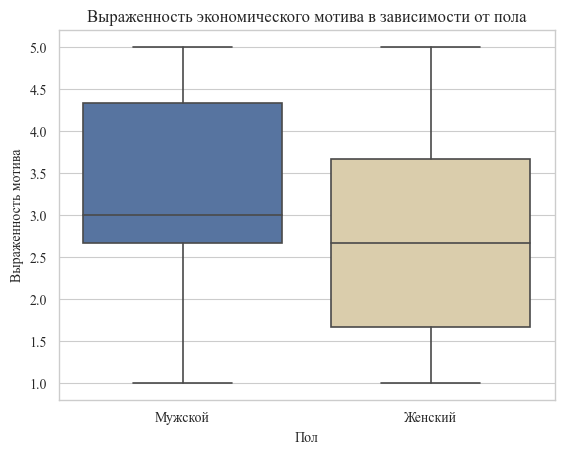

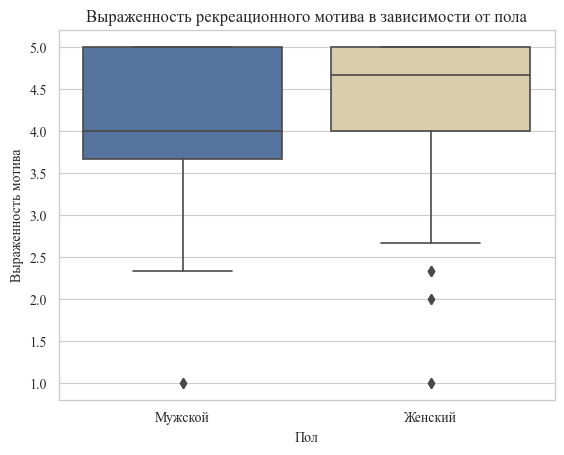

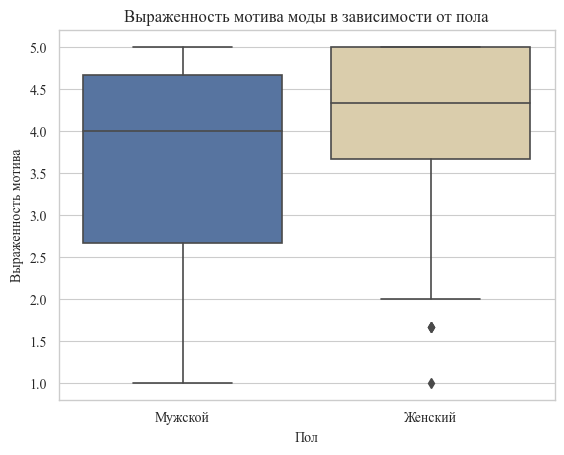

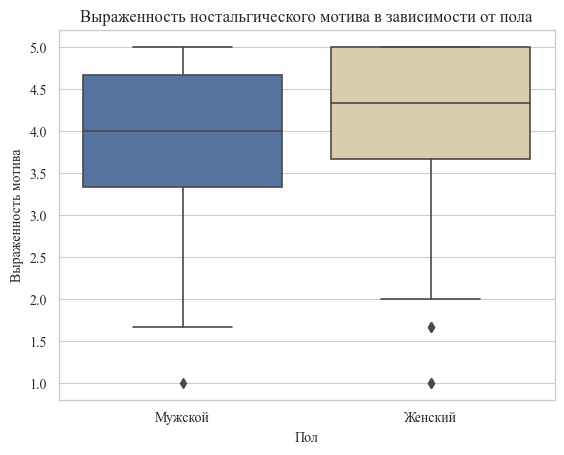

In [ ]:
for i in [['econom', 'экономического мотива'],
         #['ideol', 'идеологического мотива'],
         ['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         #['collect', 'мотива коллекционирования']
    ]:
    motiv=i[0]
    sns.boxplot(x='q_0', y=motiv, data=df, palette=palette)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel('Пол', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от пола', fontsize=12)
    plt.savefig(f'{i[0]}_пол.png', dpi=300)
    plt.show()


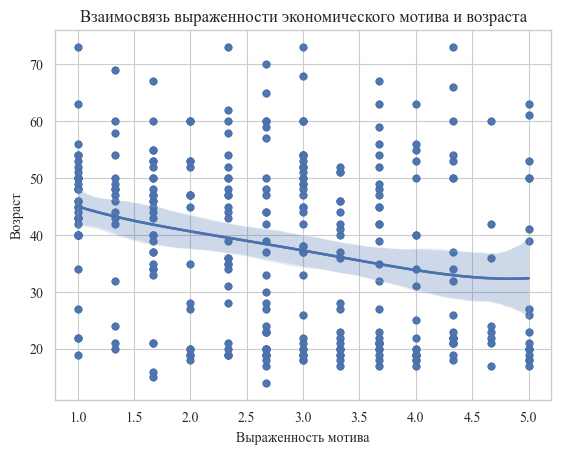

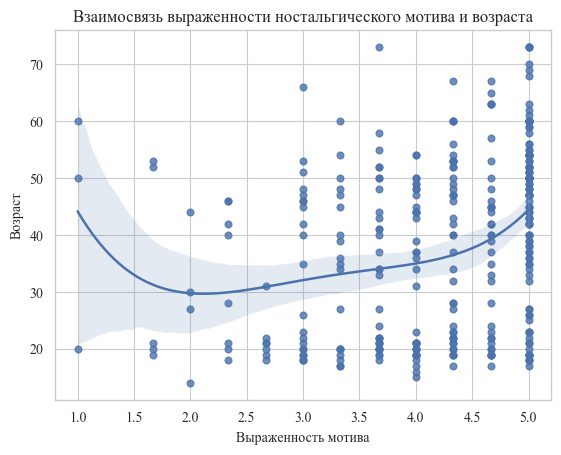

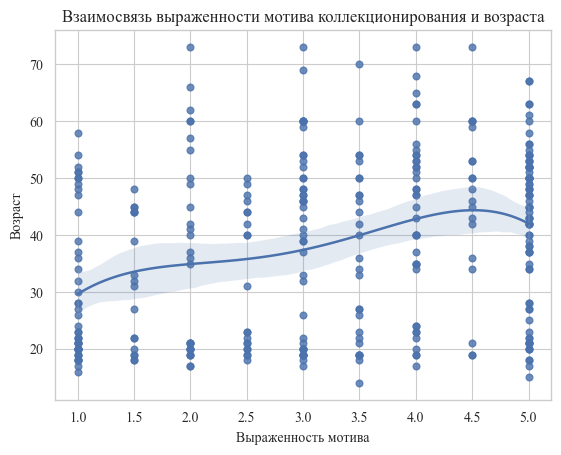

In [ ]:
sns.regplot(y='q_1', x='econom', data=df, order=4)

for i in [['econom', 'экономического мотива'],
         #['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']
    ]:
    motiv=i[0]
    sns.regplot(y='q_1', x=motiv, data=df, order=4, color=palette[0])

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel('Выраженность мотива', fontsize=10)
    plt.ylabel('Возраст', fontsize=10)
    plt.title(f'Взаимосвязь выраженности {i[1]} и возраста', fontsize=12)
    plt.savefig(f'{i[0]}_возраст.png', dpi=300)
    plt.show()

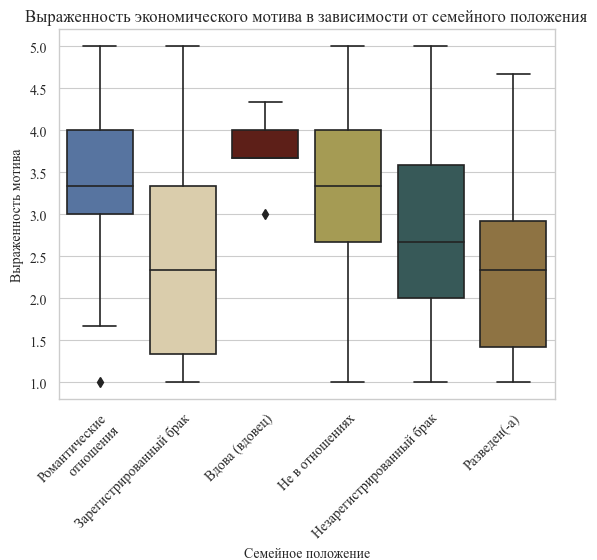

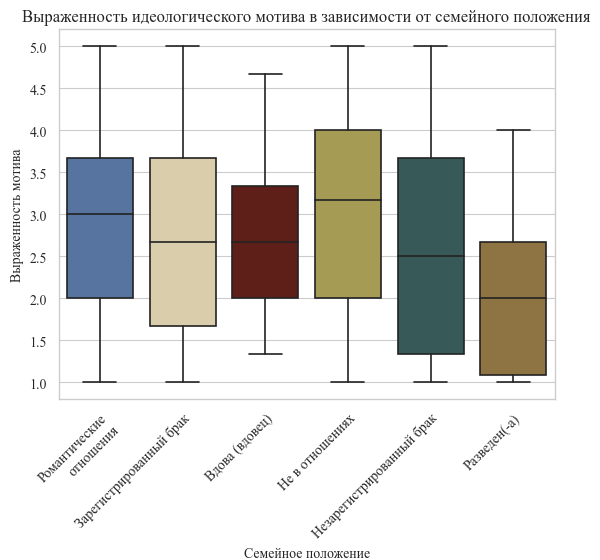

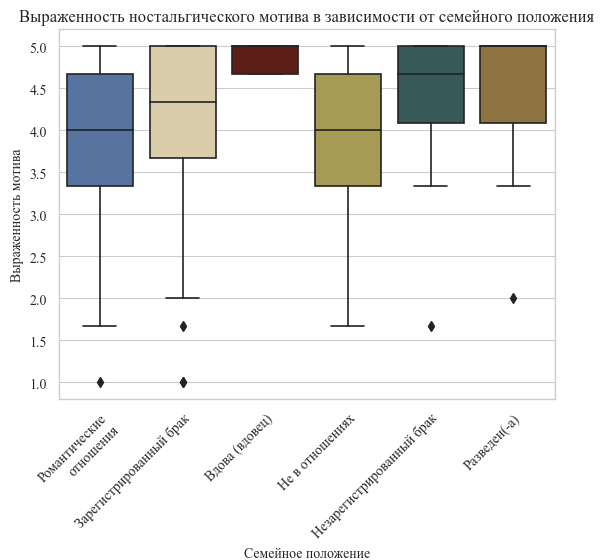

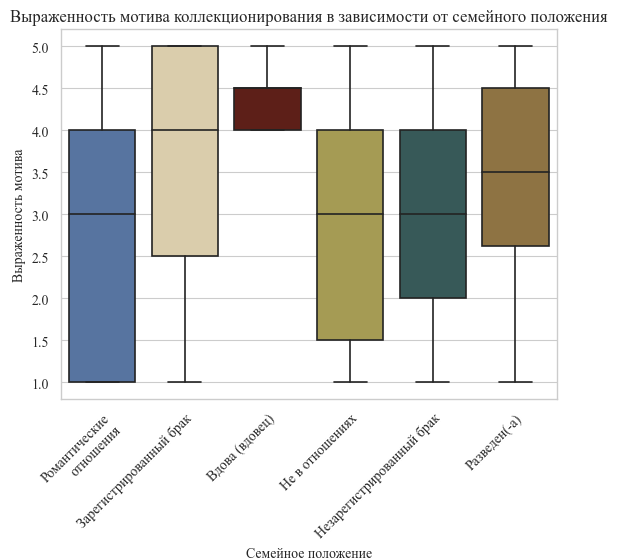

In [ ]:
#семейное положение
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv=i[0]
    sns.boxplot(x='q_28', y=motiv, data=df_short, palette=palette)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Семейное положение', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от семейного положения', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_сп.png', dpi=300, bbox_inches='tight')
    plt.show()

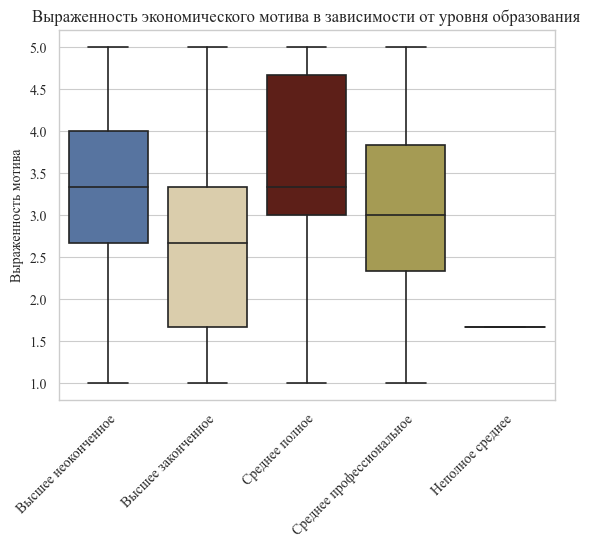

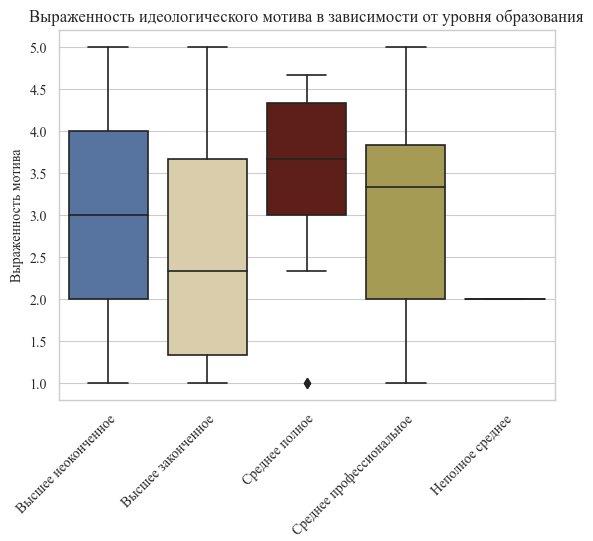

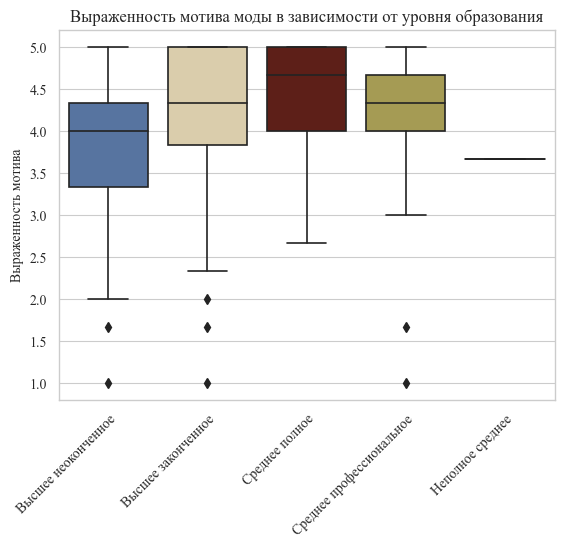

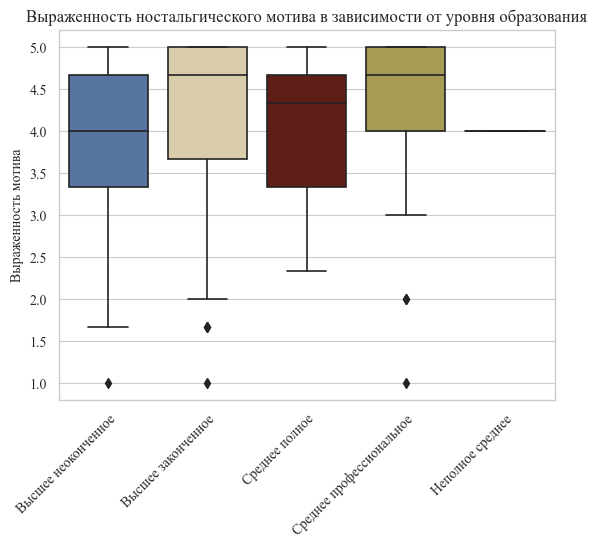

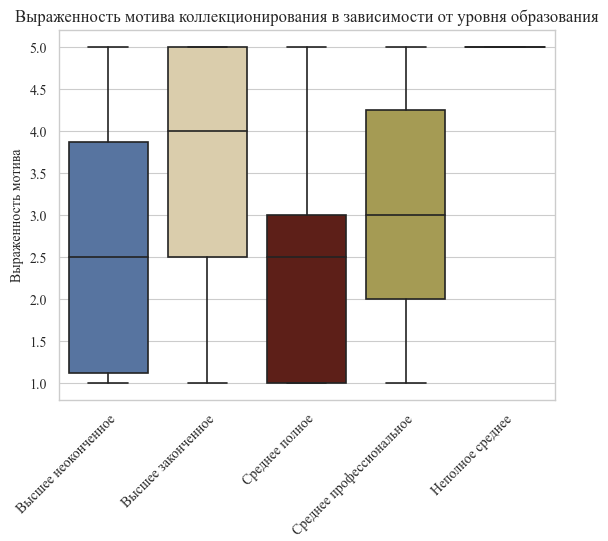

In [ ]:
#уровень образования
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv=i[0]
    sns.boxplot(x='q_29', y=motiv, data=df_short, palette=palette)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Уровень образования', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от уровня образования', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_обр.png', dpi=300, bbox_inches='tight')
    plt.show()

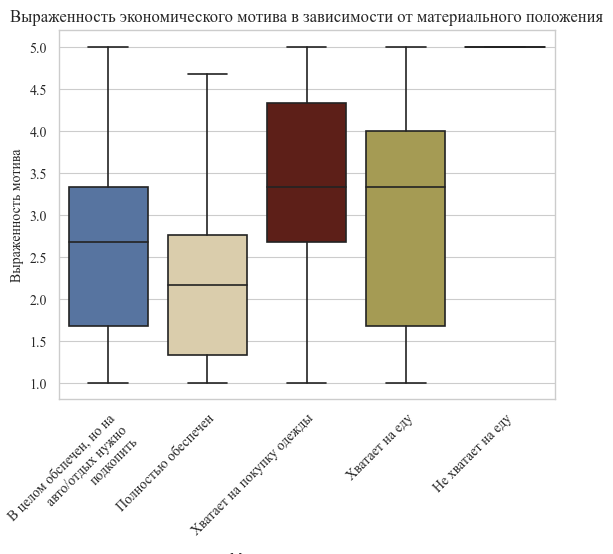

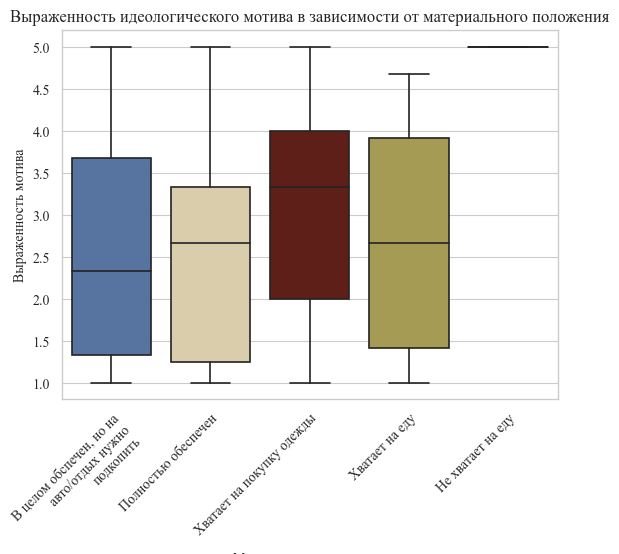

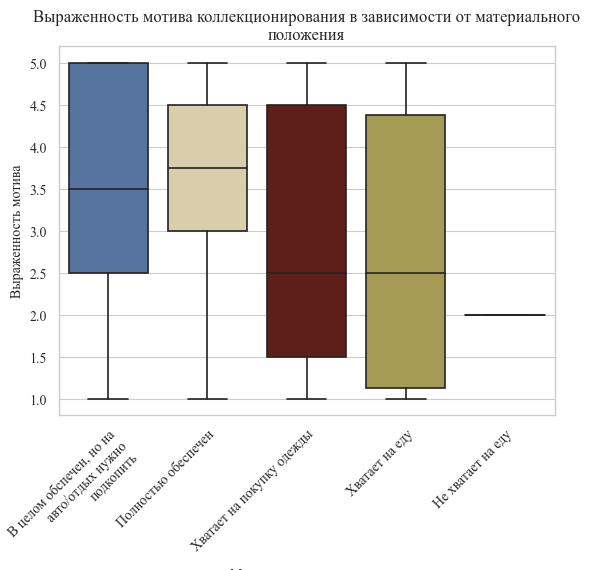

In [ ]:
#материальное положение
for i in [['econom', 'экономического мотива'],
         ['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         #['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv=i[0]
    sns.boxplot(x='q_30', y=motiv, data=df_short, palette=palette)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Материальное положение', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от материального положения', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_мп.png', dpi=300, bbox_inches='tight')
    plt.show()

**Практики**

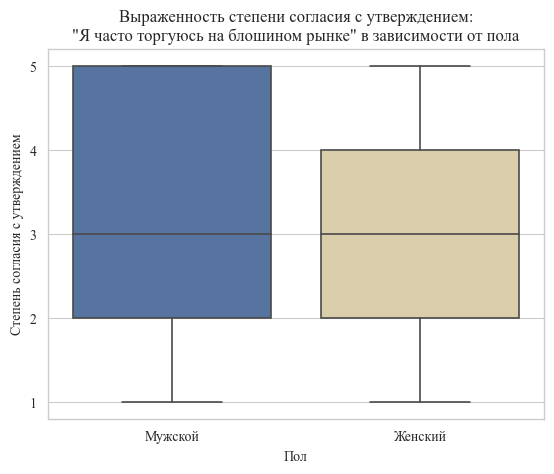

In [ ]:
for i in [#['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           #['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           #['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
    ]:
    praktika=i[0]
    sns.boxplot(x='q_0', y=praktika, data=df, palette=palette)

    plt.yticks([1,2,3,4,5], fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel('Пол', fontsize=10)
    plt.ylabel('Степень согласия с утверждением', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от пола', fontsize=12)
    plt.savefig(f'{i[0]}_пол.png', dpi=300)
    plt.show()

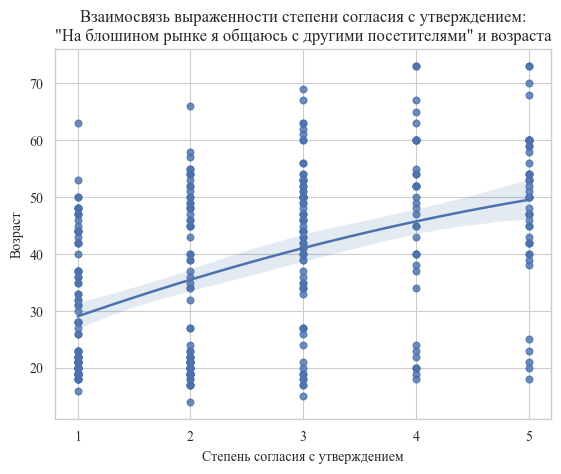

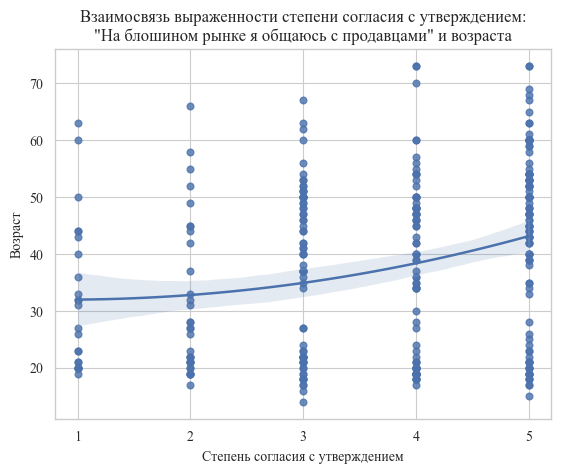

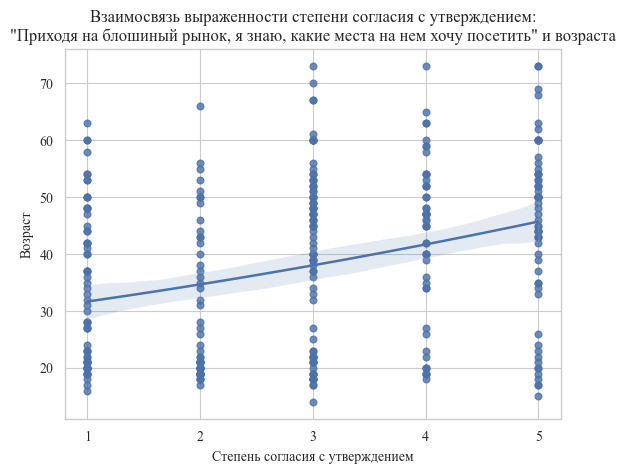

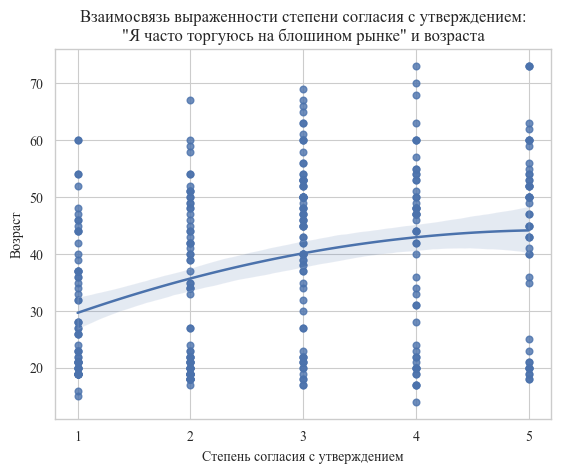

In [ ]:
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    praktika=i[0]
    sns.regplot(y='q_1', x=praktika, data=df, order=2, color=palette[0])

    plt.yticks(fontsize=10)
    plt.xticks([1,2,3,4,5], fontsize=10)
    plt.xlabel('Степень согласия с утверждением', fontsize=10)
    plt.ylabel('Возраст', fontsize=10)
    plt.title(f'Взаимосвязь выраженности {i[1]} и возраста', fontsize=12)
    plt.savefig(f'{i[0]}_возраст.png', dpi=300)
    plt.show()

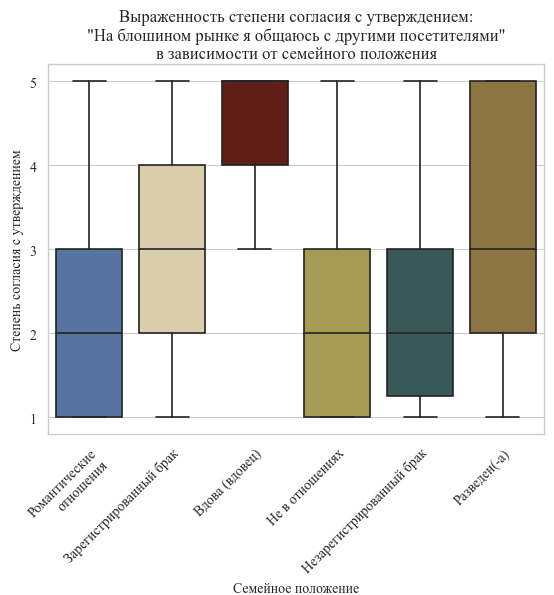

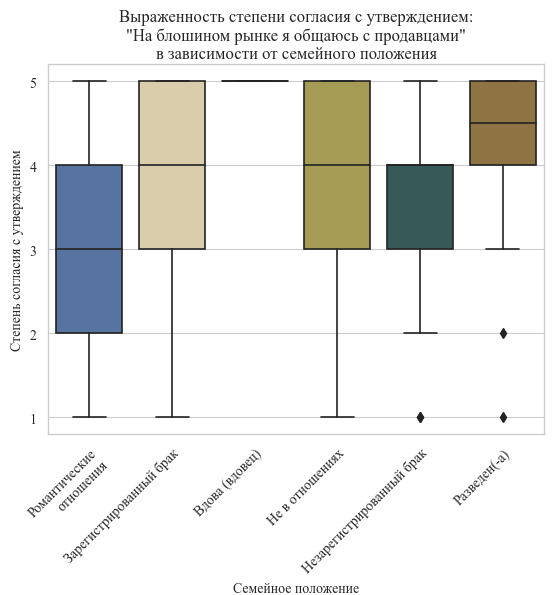

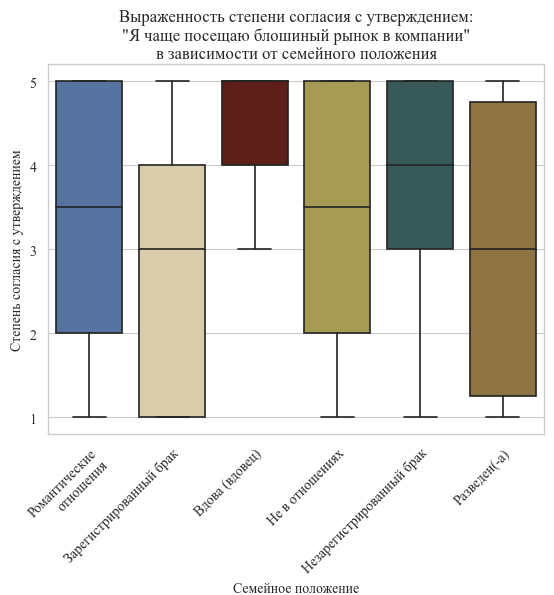

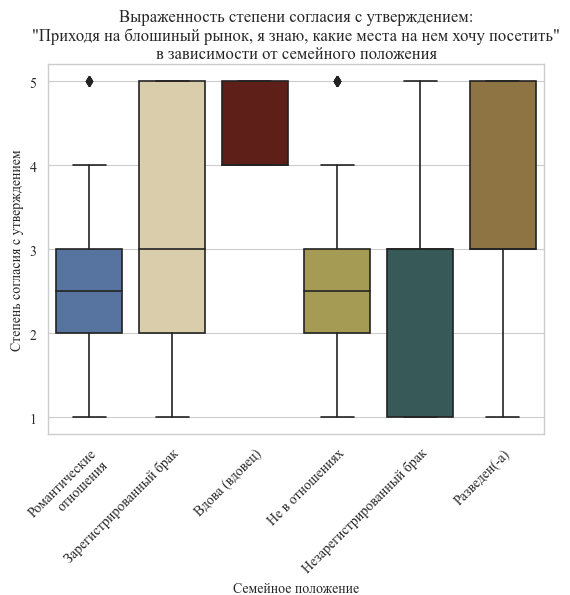

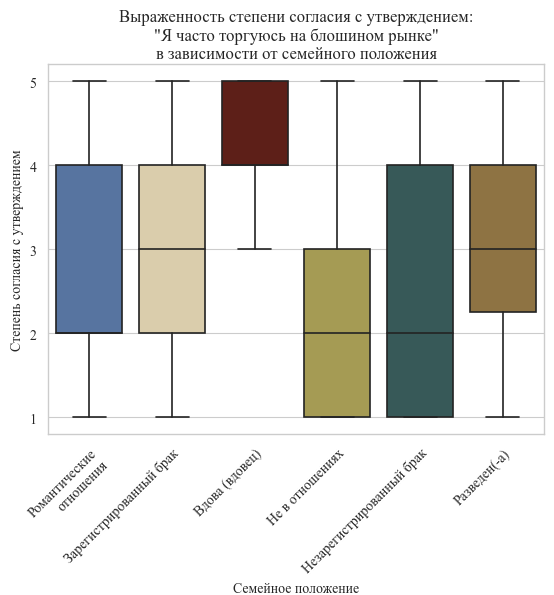

In [ ]:
#семейное положение
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           ['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    praktika=i[0]
    sns.boxplot(x='q_28', y=praktika, data=df_short, palette=palette)

    plt.yticks([1,2,3,4,5], fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Семейное положение', fontsize=10)
    plt.ylabel('Степень согласия с утверждением', fontsize=10)
    plt.title(f'Выраженность {i[1]}\nв зависимости от семейного положения', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_сп.png', dpi=300, bbox_inches='tight')
    plt.show()

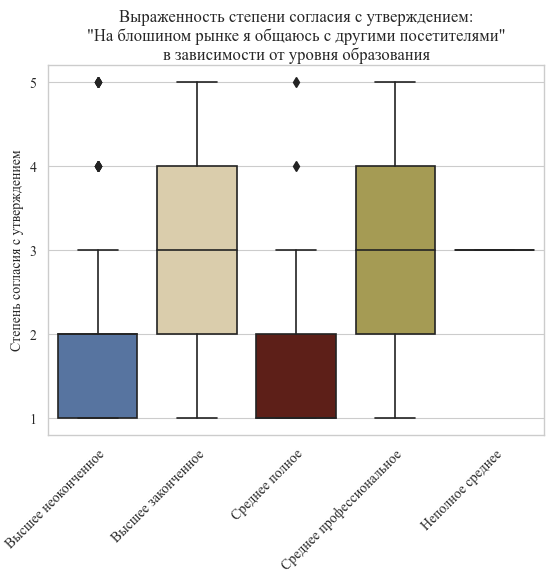

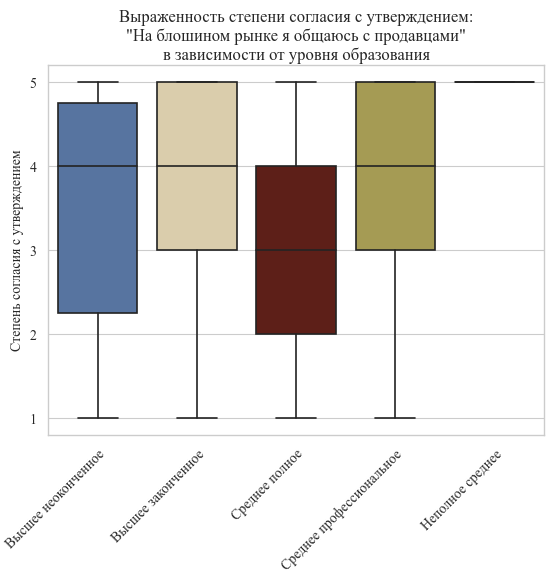

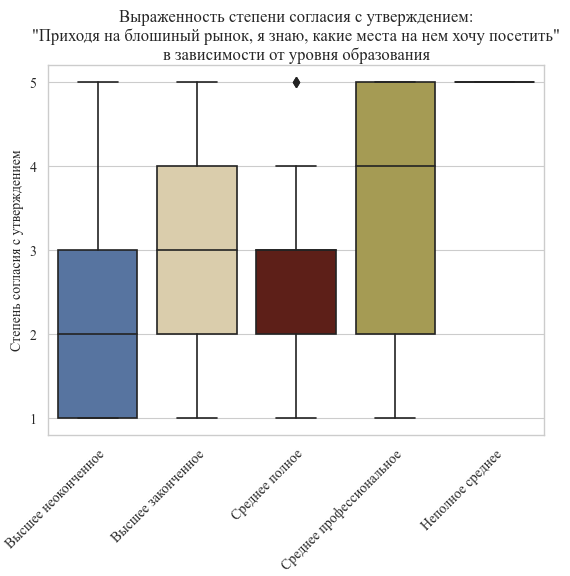

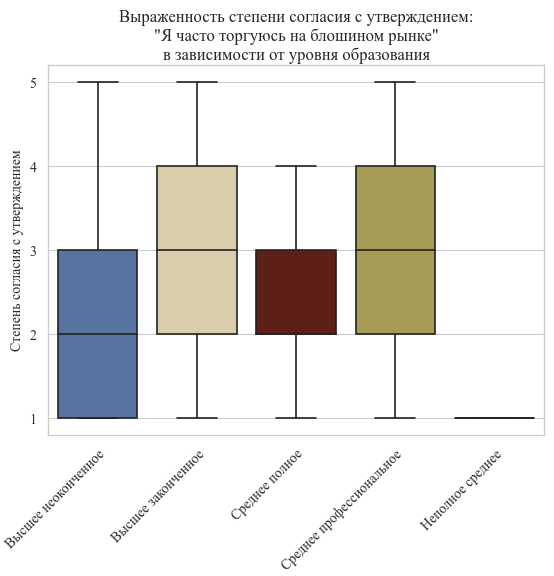

In [ ]:
#уровень образования
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           ['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           ['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           ['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    praktika=i[0]
    sns.boxplot(x='q_29', y=praktika, data=df_short, palette=palette)

    plt.yticks([1,2,3,4,5], fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Уровень образования', fontsize=10)
    plt.ylabel('Степень согласия с утверждением', fontsize=10)
    plt.title(f'Выраженность {i[1]}\nв зависимости от уровня образования', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_обр.png', dpi=300, bbox_inches='tight')
    plt.show()

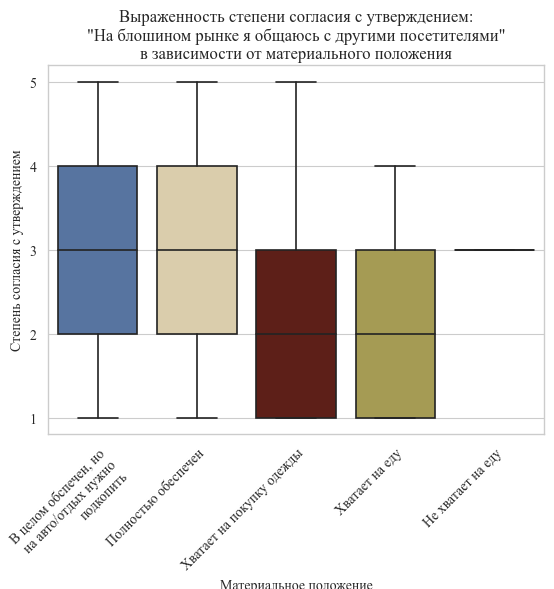

In [ ]:
#материальное положение
for i in [['q_21', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с другими посетителями"'],
           #['q_22', 'степени согласия с утверждением:\n"На блошином рынке я общаюсь с продавцами"'],
           #['q_23', 'степени согласия с утверждением:\n"Я чаще посещаю блошиный рынок в компании"'],
           #['q_24', 'степени согласия с утверждением:\n"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить"'],
           #['q_25', 'степени согласия с утверждением:\n"Я часто торгуюсь на блошином рынке"'],
           #['q_26', 'степени согласия с утверждением:\n"Я часто перерываю товары, а не беру то, что лежит на видном месте"'],
           #['q_27', 'степени согласия с утверждением:\n"Мой обычный поход на блошиный рынок сопровождается покупками"']
         ]:
    praktika=i[0]
    sns.boxplot(x='q_30', y=praktika, data=df_short, palette=palette)

    plt.yticks([1,2,3,4,5], fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Материальное положение', fontsize=10)
    plt.ylabel('Степень согласия с утверждением', fontsize=10)
    plt.title(f'Выраженность {i[1]}\nв зависимости от материального положения', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'{i[0]}_мп.png', dpi=300, bbox_inches='tight')
    plt.show()

<a id='m-p'></a>
# Выявить взаимосвязь между мотивами и практиками посещения блошиных рынков.

<a id='m-p_stat'></a>
### Статистика

In [ ]:
praktiki_list = ['q_21', 'q_22', 'q_23', 'q_24', 'q_25', 'q_26', 'q_27']
motivi_list = ['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']
motivi_df = df[['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']]
motivi_names = ['экономический мотив', 'идеологический мотив', 'рекреационный мотив', 'мотив моды', 'ностальгический мотив', 'мотив коллекционирования']

In [ ]:
#порядковые регрессии
X=df[['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']]
for i in praktiki_list:
    print(i, dict_orig[i])
    ol = OrderedLogit()
    Y=df[i]
    ol.fit(X, Y)
    ol.print_summary()
    print('')
    ol_df = ol.summary
    ol_df.index = motivi_names
    ol_df.to_excel(f'ol_{i}.xlsx')

q_21 На блошином рынке я общаюсь с другими посетителями
n=322
                   beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                      
econom          -0.1833    0.1089 0.0924     -0.3968      0.0302    .
ideol            0.0822    0.1000 0.4108     -0.1137      0.2782     
recrea           0.2638    0.1563 0.0916     -0.0427      0.5702    .
moda             0.0548    0.1493 0.7138     -0.2379      0.3474     
nostal           0.3541    0.1453 0.0148      0.0693      0.6389    *
collect          0.3577    0.0811 0.0000      0.1987      0.5167  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.322

q_22 На блошином рынке я общаюсь с продавцами
n=322
                   beta  se(beta)      p  lower 0.95  upper 0.95    
attribute names                                                     
econom          -0.1601    0.1101 0.1461     -0.3759      0.0558    
ideol            0.0546    0.10

In [ ]:
#частота посещения
for i in ['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']:
    a = stats.kruskal(*df.groupby('q_3')[i].apply(list).tolist())
    stat, pv = [round(ii, 3) for ii in a]
    print(f'P-value критерия Краскела-Уоллиса для {i} и частоты посещения: {pv}')

P-value критерия Краскела-Уоллиса для econom и частоты посещения: 0.611
P-value критерия Краскела-Уоллиса для ideol и частоты посещения: 0.256
P-value критерия Краскела-Уоллиса для recrea и частоты посещения: 0.021
P-value критерия Краскела-Уоллиса для moda и частоты посещения: 0.0
P-value критерия Краскела-Уоллиса для nostal и частоты посещения: 0.0
P-value критерия Краскела-Уоллиса для collect и частоты посещения: 0.0


In [ ]:
for i in [#'econom',
          #'ideol',
          'recrea',
          'moda',
          'nostal',
          'collect'
         ]:
    motiv_by_posecheniye = df.groupby('q_3')[i].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_posecheniye, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_posecheniye
    dunn_motiv.index = names_posecheniye
    dunn_motiv.to_excel(f'dunn_posecheniye_{i}.xlsx')

<a id='m-p_vis'></a>
### Визуализация

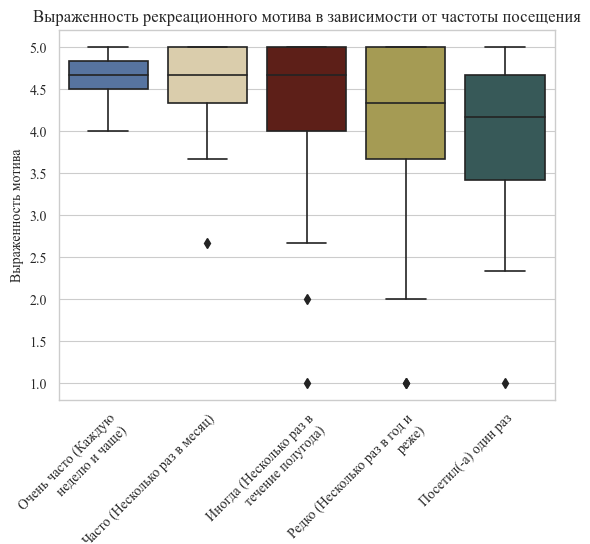

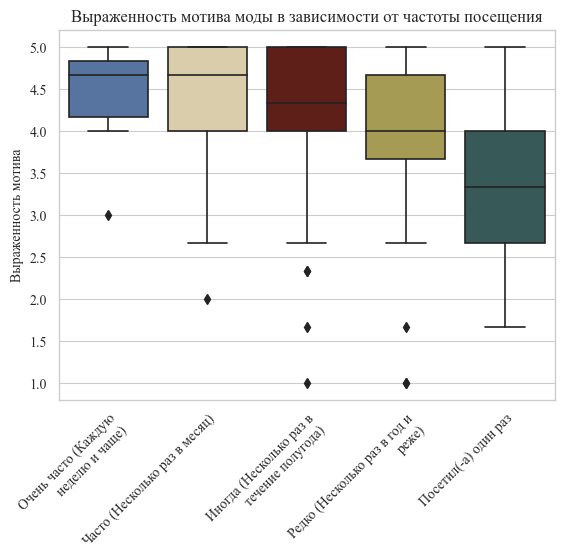

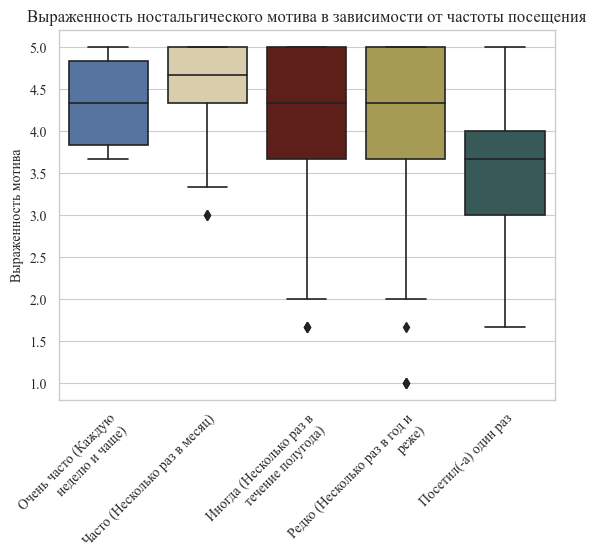

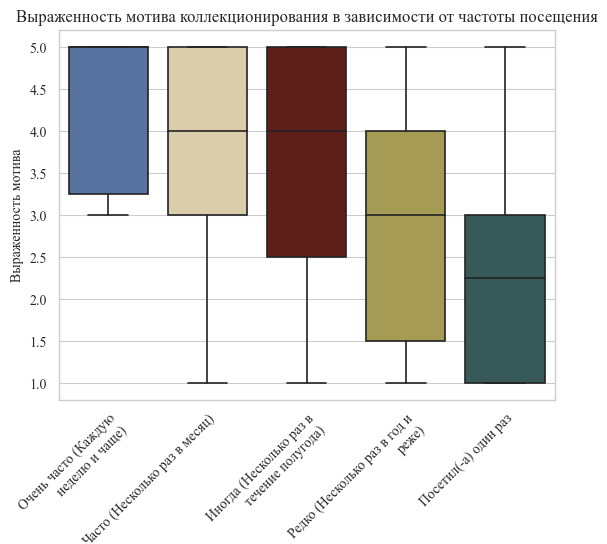

In [ ]:
lorder = [
    'Очень часто (Каждую неделю и чаще)',
    'Часто (Несколько раз в месяц)',
    'Иногда (Несколько раз в течение полугода)',
    'Редко (Несколько раз в год и реже)',
    'Посетил(-а) один раз'
]
for i in [#['econom', 'экономического мотива'],
         #['ideol', 'идеологического мотива'],
         ['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv=i[0]
    sns.boxplot(x='q_3', y=motiv, data=df, palette=palette, order = lorder)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Частота посещения блошиного рынка', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от частоты посещения', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'расп_{i[0]}_posecheniye.png', dpi=300, bbox_inches='tight')
    plt.show()

<a id='rinki'></a>
# Выяснить, как предпочтение к посещению того или иного блошиного рынка связано со структурой практик и мотивов посетителя

<a id='rinki_stat'></a>
### Статистика

In [ ]:
#мотивы
for i in range(len(motivi)):
    pv = round(stats.mannwhitneyu(df[df['br_type']==0][motivi[i][0]], df[df['br_type']==1][motivi[i][0]])[1], 3)
    print(f'P-value критерия Манна-Уитни для {motivi[i][1]} и типа блошиного рынка: {pv}')

P-value критерия Манна-Уитни для экономического мотива и типа блошиного рынка: 0.0
P-value критерия Манна-Уитни для идеологического мотива и типа блошиного рынка: 0.114
P-value критерия Манна-Уитни для рекреационного мотива и типа блошиного рынка: 0.238
P-value критерия Манна-Уитни для мотива моды и типа блошиного рынка: 0.077
P-value критерия Манна-Уитни для ностальгического мотива и типа блошиного рынка: 0.178
P-value критерия Манна-Уитни для мотива коллекционирования и типа блошиного рынка: 0.24


In [ ]:
#практики
for i in range(len(praktiki)):
    pv = round(stats.mannwhitneyu(df[df['br_type']==0][praktiki[i][0]], df[df['br_type']==1][praktiki[i][0]])[1], 3)
    print(f'P-value критерия Манна-Уитни для {praktiki[i][1]} и типа блошиного рынка: {pv}')

P-value критерия Манна-Уитни для степени согласия с утверждением:
"На блошином рынке я общаюсь с другими посетителями" и типа блошиного рынка: 0.33
P-value критерия Манна-Уитни для степени согласия с утверждением:
"На блошином рынке я общаюсь с продавцами" и типа блошиного рынка: 0.368
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я чаще посещаю блошиный рынок в компании" и типа блошиного рынка: 0.582
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Приходя на блошиный рынок, я знаю, какие места на нем хочу посетить" и типа блошиного рынка: 0.842
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я часто торгуюсь на блошином рынке" и типа блошиного рынка: 0.818
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Я часто перерываю товары, а не беру то, что лежит на видном месте" и типа блошиного рынка: 0.106
P-value критерия Манна-Уитни для степени согласия с утверждением:
"Мой обычный поход на блошиный рынок сопровож

In [ ]:
#классические рынки
#порядковые регрессии
df_0 = df[df['br_type']==0]
X=df_0[['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']]
for i in praktiki_list:
    print(i, dict_orig[i])
    ol = OrderedLogit()
    Y=df_0[i]
    ol.fit(X, Y)
    ol.print_summary()
    print('')
    ol_df_0 = ol.summary
    ol_df_0.index = motivi_names
    ol_df_0.to_excel(f'klassic_ol_{i}.xlsx')

q_21 На блошином рынке я общаюсь с другими посетителями
n=108
                   beta  se(beta)      p  lower 0.95  upper 0.95    
attribute names                                                     
econom          -0.3117    0.1861 0.0939     -0.6764      0.0530   .
ideol            0.2800    0.1710 0.1016     -0.0552      0.6151    
recrea          -0.0354    0.2315 0.8785     -0.4890      0.4182    
moda             0.1313    0.2552 0.6068     -0.3689      0.6316    
nostal           0.1676    0.2395 0.4839     -0.3017      0.6370    
collect          0.4358    0.1428 0.0023      0.1560      0.7156  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.334

q_22 На блошином рынке я общаюсь с продавцами
n=108
                   beta  se(beta)      p  lower 0.95  upper 0.95    
attribute names                                                     
econom          -0.2914    0.1929 0.1308     -0.6694      0.0866    
ideol            0.2117    0.1800 0.239

In [ ]:
#частота посещения классические
for i in ['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']:
    a = stats.kruskal(*df[df['br_type']==0].groupby('q_3')[i].apply(list).tolist())
    stat, pv = [round(ii, 3) for ii in a]
    print(f'P-value критерия Краскела-Уоллиса для {i} и частоты посещения: {pv}')

P-value критерия Краскела-Уоллиса для econom и частоты посещения: 0.082
P-value критерия Краскела-Уоллиса для ideol и частоты посещения: 0.513
P-value критерия Краскела-Уоллиса для recrea и частоты посещения: 0.068
P-value критерия Краскела-Уоллиса для moda и частоты посещения: 0.001
P-value критерия Краскела-Уоллиса для nostal и частоты посещения: 0.001
P-value критерия Краскела-Уоллиса для collect и частоты посещения: 0.0


In [ ]:
for i in [#'econom',
          #'ideol',
          #'recrea',
          'moda',
          'nostal',
          'collect'
         ]:
    motiv_by_posecheniye = df[df['br_type']==0].groupby('q_3')[i].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_posecheniye, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_posecheniye
    dunn_motiv.index = names_posecheniye
    dunn_motiv.to_excel(f'dunn_narodniye_posecheniye_{i}.xlsx')
    print(i)
    print(dunn_motiv)
    print('')

moda
                                           Иногда (Несколько раз в течение полугода)  \
Иногда (Несколько раз в течение полугода)                                      1.000   
Очень часто (Каждую неделю и чаще)                                             1.000   
Посетил(-а) один раз                                                           0.000   
Редко (Несколько раз в год и реже)                                             0.076   
Часто (Несколько раз в месяц)                                                  1.000   

                                           Очень часто (Каждую неделю и чаще)  \
Иногда (Несколько раз в течение полугода)                                 1.0   
Очень часто (Каждую неделю и чаще)                                        1.0   
Посетил(-а) один раз                                                      1.0   
Редко (Несколько раз в год и реже)                                        1.0   
Часто (Несколько раз в месяц)                                

In [ ]:
#элитарные рынки
#порядковые регрессии
df_1 = df[df['br_type']==1]
X=df_1[['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']]
for i in praktiki_list:
    print(i, dict_orig[i])
    ol = OrderedLogit()
    Y=df_1[i]
    ol.fit(X, Y)
    ol.print_summary()
    print('')
    ol_df_1 = ol.summary
    ol_df_1.index = motivi_names
    ol_df_1.to_excel(f'elite_ol_{i}.xlsx')

q_21 На блошином рынке я общаюсь с другими посетителями
n=128
                   beta  se(beta)      p  lower 0.95  upper 0.95   
attribute names                                                    
econom           0.0779    0.1785 0.6625     -0.2720      0.4278   
ideol           -0.0048    0.1516 0.9749     -0.3019      0.2923   
recrea           0.7390    0.3006 0.0140      0.1498      1.3282  *
moda            -0.0523    0.2515 0.8353     -0.5452      0.4406   
nostal           0.4981    0.2645 0.0597     -0.0204      1.0166  .
collect          0.2273    0.1274 0.0743     -0.0223      0.4770  .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 

Somers' D = 0.329

q_22 На блошином рынке я общаюсь с продавцами
n=128
                   beta  se(beta)      p  lower 0.95  upper 0.95   
attribute names                                                    
econom          -0.0610    0.1860 0.7430     -0.4255      0.3035   
ideol            0.0191    0.1527 0.9006     -0.28

In [ ]:
#частота посещения элитарыне
for i in ['econom', 'ideol', 'recrea', 'moda', 'nostal', 'collect']:
    a = stats.kruskal(*df[df['br_type']==1].groupby('q_3')[i].apply(list).tolist())
    stat, pv = [round(ii, 3) for ii in a]
    print(f'P-value критерия Краскела-Уоллиса для {i} и частоты посещения: {pv}')

P-value критерия Краскела-Уоллиса для econom и частоты посещения: 0.51
P-value критерия Краскела-Уоллиса для ideol и частоты посещения: 0.728
P-value критерия Краскела-Уоллиса для recrea и частоты посещения: 0.338
P-value критерия Краскела-Уоллиса для moda и частоты посещения: 0.269
P-value критерия Краскела-Уоллиса для nostal и частоты посещения: 0.346
P-value критерия Краскела-Уоллиса для collect и частоты посещения: 0.57


In [ ]:
for i in [#'econom',
          #'ideol',
          #'recrea',
          #'moda',
          #'nostal',
          #'collect'
         ]:
    motiv_by_posecheniye = df[df['br_type']==1].groupby('q_3')[i].apply(list).tolist()
    dunn_motiv = sp.posthoc_dunn(motiv_by_posecheniye, p_adjust = 'bonferroni').round(3)
    dunn_motiv.columns = names_posecheniye
    dunn_motiv.index = names_posecheniye
    dunn_motiv.to_excel(f'dunn_narodniye_posecheniye_{i}.xlsx')

<a id='rinki_vis'></a>
### Визуализация

In [ ]:
df_types = df[(df['br_type']==0)| (df['br_type']==1)]
df_types['br_type'] = df_types['br_type'].map({0:'"Классический"', 1:'"Премиальный"'})

C:\Users\slstYY\AppData\Local\Temp\ipykernel_784\2449806700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_types['br_type'] = df_types['br_type'].map({0:'"Классический"', 1:'"Премиальный"'})


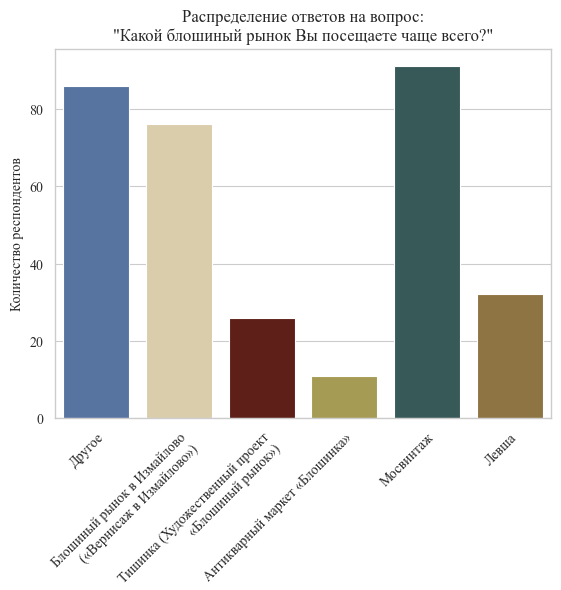

In [ ]:
sns.countplot(x='q_2', data=df, palette=palette)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10, wrap=True)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
plt.xlabel('Самый посещаемый рынок', fontsize=10)
plt.ylabel('Количество респондентов', fontsize=10)
plt.title('Распределение ответов на вопрос:\n"Какой блошиный рынок Вы посещаете чаще всего?"', fontsize=12)
plt.savefig('рынки_расп.png', dpi=300, bbox_inches='tight')

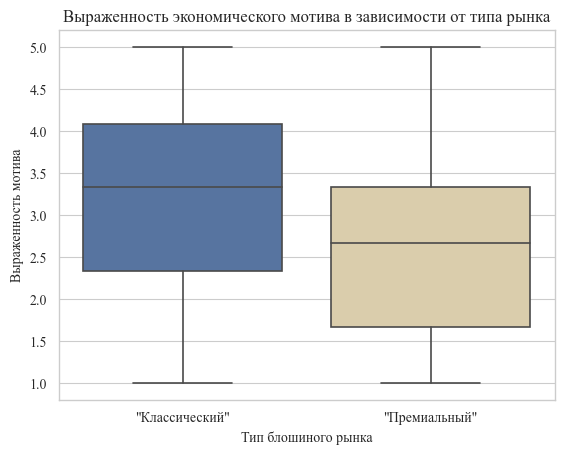

In [ ]:
#мотивы
for i in [['econom', 'экономического мотива'],
         #['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         #['moda', 'мотива моды'],
         #['nostal', 'ностальгического мотива'],
         #['collect', 'мотива коллекционирования']
    ]:
    motiv=i[0]
    sns.boxplot(x='br_type', y=motiv, data=df_types, palette=palette)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.xlabel('Тип блошиного рынка', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от типа рынка', fontsize=12)
    plt.savefig(f'{i[0]}_тип_рынка.png', dpi=300)
    plt.show()

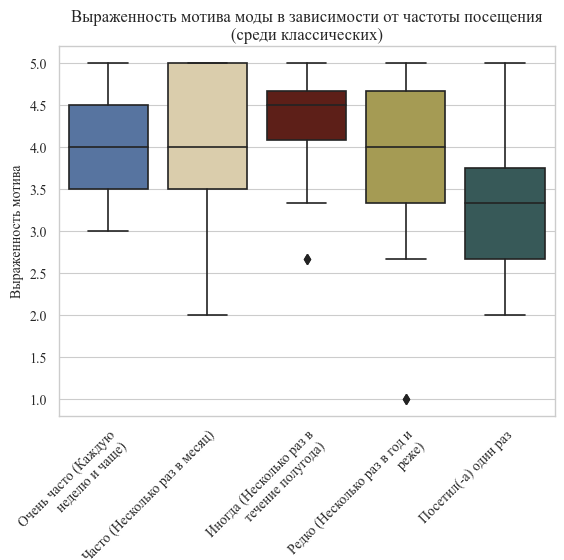

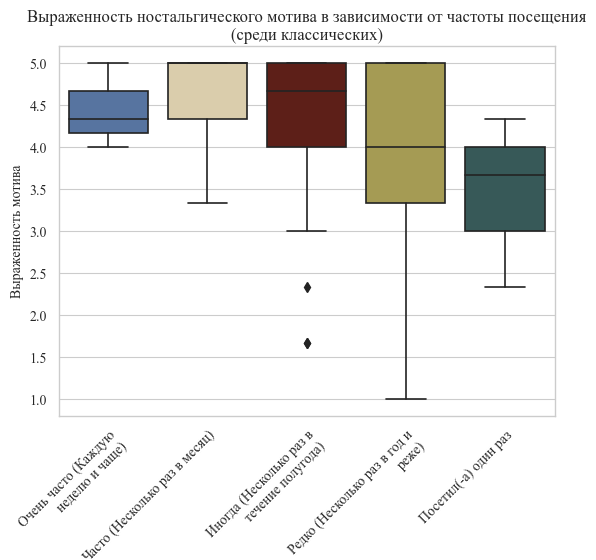

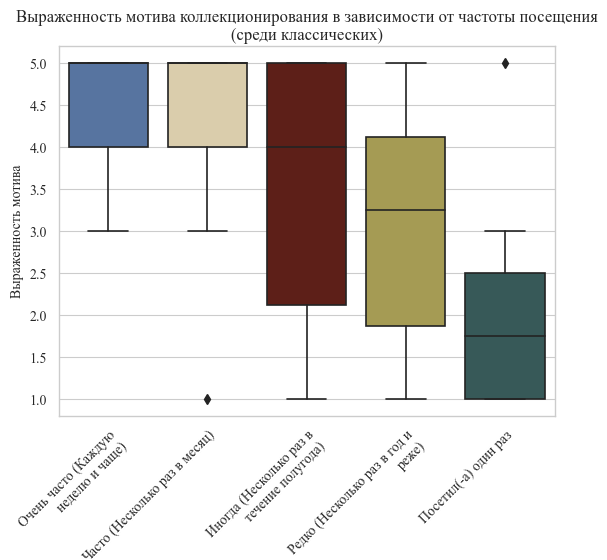

In [ ]:
#классические
for i in [#['econom', 'экономического мотива'],
         #['ideol', 'идеологического мотива'],
         #['recrea', 'рекреационного мотива'],
         ['moda', 'мотива моды'],
         ['nostal', 'ностальгического мотива'],
         ['collect', 'мотива коллекционирования']]:
    motiv=i[0]
    sns.boxplot(x='q_3', y=motiv, data=df[df['br_type']==0], palette=palette, order = lorder)

    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', wrap=True)
    plt.xlabel('Частота посещения блошиного рынка', fontsize=10)
    plt.ylabel('Выраженность мотива', fontsize=10)
    plt.title(f'Выраженность {i[1]} в зависимости от частоты посещения\n(среди классических)', fontsize=12, ha='center', wrap=True)
    plt.savefig(f'классический_расп_{i[0]}_posecheniye.png', dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
#df.to_excel('br_coded.xlsx')